In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import optimize
np.random.seed(42)

# Wpływ nieznanych parametrów rozkładów na algorytm przerzedzania danych

## Rozkład normalny

In [42]:
#Rysunek 4.1 (4 wykresy z odpowiednio dobranymi parametrami rozkładu oraz parametrem eps)

def normal_thinning(x, eps, sigma):
  x1 = np.random.normal(loc = eps*x, scale = np.sqrt(eps*(1-eps)*sigma), size=len(x))
  x2 = x - x1
  return x1, x2

x1_list = []
x2_list = []
cors = []

mu = 5
sigma = 10
n = 100000
x = np.random.normal(loc = mu, scale = np.sqrt(sigma), size = n)
eps = 0.9
sigmas = 10 ** np.linspace(-1, 3, num=50)
#sigmas = np.arange(0,100)

for i in range(50):
  x1, x2 = normal_thinning(x=x, eps=eps, sigma=sigmas[i])
  x1_list.append(x1)
  x2_list.append(x2)
  cors.append(np.corrcoef(x1,x2)[0,1])

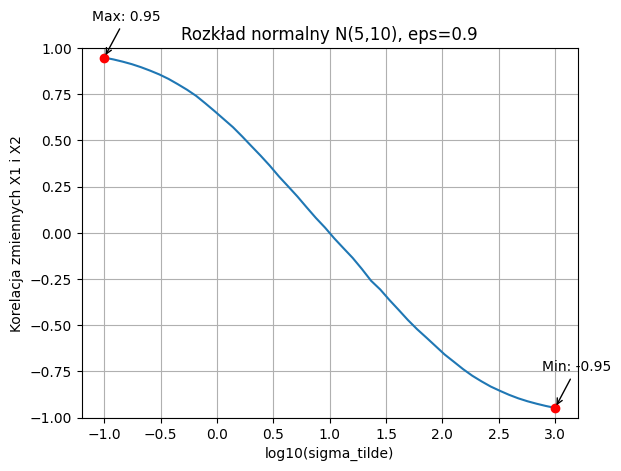

In [43]:
min_idx = np.argmin(cors)
max_idx = np.argmax(cors)
min_val = cors[min_idx]
max_val = cors[max_idx]
min_sigma = sigmas[min_idx]
max_sigma = sigmas[max_idx]

plt.plot(np.log10(sigmas), cors) 
plt.xlabel('log10(sigma_tilde)')
#plt.plot(sigmas, cors)
#plt.xlabel('sigma_tilde')
plt.ylim(-1, 1)
plt.ylabel('Korelacja zmiennych X1 i X2')
plt.title('Rozkład normalny N(5,10), eps=0.9')

plt.plot(np.log10(min_sigma), min_val, 'ro') 
plt.plot(np.log10(max_sigma), max_val, 'ro')  
plt.annotate(f'Min: {min_val:.2f}', 
             xy=(np.log10(min_sigma), min_val), 
             xytext=(np.log10(min_sigma) + 0.5, min_val + 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='right')

plt.annotate(f'Max: {max_val:.2f}', 
             xy=(np.log10(max_sigma), max_val), 
             xytext=(np.log10(max_sigma) + 0.5, max_val + 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='right')

plt.grid(True)
plt.show()

## Rozkład Gamma

In [44]:
#Rysunek 4.2 (4 wykresy z odpowiednio dobranymi parametrami rozkładu oraz parametrem eps)

def gamma_thinning(x, eps, alpha):
  z = np.random.beta(a = eps*alpha, b = (1-eps)*alpha, size = len(x))
  x1 = x*z
  x2 = x - x1
  return x1, x2

x1_list = []
x2_list = []
cors = []

alpha = 5
beta = 10
n = 100000
x = np.random.gamma(shape = alpha, scale = beta, size = n)
eps = 0.9
#sigmas = 10 ** np.linspace(-1, 3, num=50)
alphas = np.power(10, np.linspace(-np.log10(100), np.log10(1000), num=50))

for i in range(50):
  x1, x2 = gamma_thinning(x=x, eps=eps, alpha=alphas[i])
  x1_list.append(x1)
  x2_list.append(x2)
  cors.append(np.corrcoef(x1,x2)[0,1])

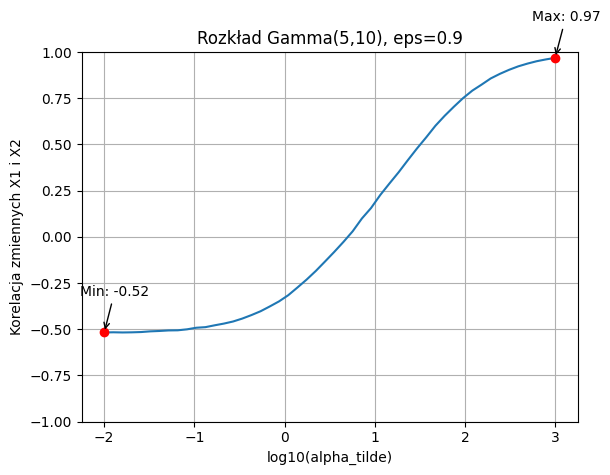

In [45]:
min_idx = np.argmin(cors)
max_idx = np.argmax(cors)
min_val = cors[min_idx]
max_val = cors[max_idx]
min_sigma = alphas[min_idx]
max_sigma = alphas[max_idx]

plt.plot(np.log10(alphas), cors)
plt.xlabel('log10(alpha_tilde)')
#plt.plot(alphas, cors)
#plt.xlabel('alpha_tilde')
plt.ylabel('Korelacja zmiennych X1 i X2')
plt.ylim(-1, 1)
plt.title('Rozkład Gamma(5,10), eps=0.9')

plt.plot(np.log10(min_sigma), min_val, 'ro') 
plt.plot(np.log10(max_sigma), max_val, 'ro')  
plt.annotate(f'Min: {min_val:.2f}', 
             xy=(np.log10(min_sigma), min_val), 
             xytext=(np.log10(min_sigma) + 0.5, min_val + 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='right')

plt.annotate(f'Max: {max_val:.2f}', 
             xy=(np.log10(max_sigma), max_val), 
             xytext=(np.log10(max_sigma) + 0.5, max_val + 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='right')
plt.grid(True)
plt.show()

## Rozkład ujemny dwumianowy

In [46]:
#Rysunek 4.3 (4 wykresy z odpowiednio dobranymi parametrami rozkładu oraz parametrem eps)

from scipy.stats import betabinom

def nb_thinning(x, eps, r):
  x1 = betabinom.rvs(n = x, a = eps*r, b = (1-eps)*r, size = len(x))
  x2 = x - x1
  return x1, x2

x1_list = []
x2_list = []
cors = []

n = 50
p = 0.1
size = 100000
x = np.random.negative_binomial(n = n, p = p, size = size)
eps = 0.5
#sigmas = 10 ** np.linspace(-1, 3, num=50)
rs = np.power(10, np.linspace(-np.log10(100000), np.log10(1000000), num=50))

for i in range(50):
  x1, x2 = nb_thinning(x=x, eps=eps, r=rs[i])
  x1_list.append(x1)
  x2_list.append(x2)
  cors.append(np.corrcoef(x1,x2)[0,1])

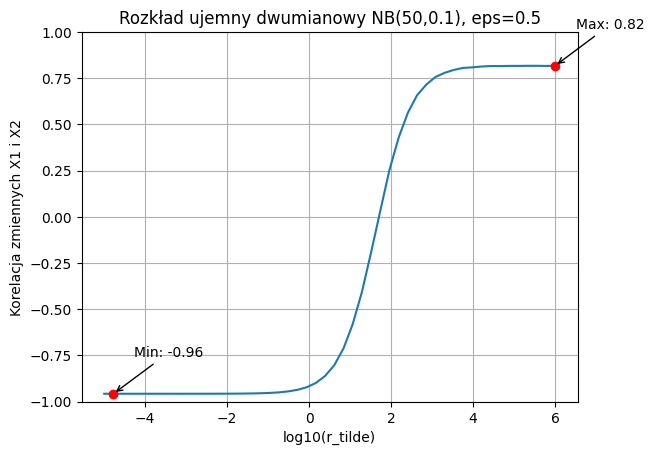

In [47]:
min_idx = np.argmin(cors)
max_idx = np.argmax(cors)
min_val = cors[min_idx]
max_val = cors[max_idx]
min_sigma = rs[min_idx]
max_sigma = rs[max_idx]

plt.plot(np.log10(rs), cors)
plt.xlabel('log10(r_tilde)')
#plt.plot(alphas, cors)
#plt.xlabel('alpha_tilde')
plt.ylabel('Korelacja zmiennych X1 i X2')
plt.ylim(-1, 1)
plt.title('Rozkład ujemny dwumianowy NB(50,0.1), eps=0.5')

plt.plot(np.log10(min_sigma), min_val, 'ro') 
plt.plot(np.log10(max_sigma), max_val, 'ro')  
plt.annotate(f'Min: {min_val:.2f}', 
             xy=(np.log10(min_sigma), min_val), 
             xytext=(np.log10(min_sigma) + 0.5, min_val + 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='left')

plt.annotate(f'Max: {max_val:.2f}', 
             xy=(np.log10(max_sigma), max_val), 
             xytext=(np.log10(max_sigma) + 0.5, max_val + 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='left')

plt.grid(True)
plt.show()

# Wybów liczby składowych głównych w danych pochodzących z rozkładu dwumianowego

In [2]:
#simulation setup

from scipy.stats import ortho_group
from scipy.special import expit

n = 250
d = 100
K = 10
#diag_values = np.arange(5,15,1)
#diag_values = np.arange(10,30,1)
diag_values = np.arange(20,30,1)
D = np.diag(diag_values)

#orthogonal_matrix = ortho_group.rvs(K) #kwadratowa

#funkcja do wybierania pierwszych nPC kolumn z macierzy ortogonalnej
def randortho_subset(n, nPC):
    #losowa macierz ortogonalna nxn
    orthogonal_matrix = np.linalg.qr(np.random.randn(n, n))[0]
    
    # pierwsze nPC kolumn
    subset_matrix = orthogonal_matrix[:, :nPC]
    
    return subset_matrix

nPC = K

U = randortho_subset(n, nPC)
print("U:", U.shape)
V = randortho_subset(d, nPC)
print("V: ",V.shape)

theta = U @ D @ V.T
print("theta: ",theta.shape)

p = expit(theta)
print("p: ", p.shape) #p_ij - macierz



U: (250, 10)
V:  (100, 10)
theta:  (250, 100)
p:  (250, 100)


In [3]:
#generowanie obserwacji

X = np.zeros((n, d))
r = 100
X.flat = np.random.binomial(r, p.flat, size=n*d)
X

array([[37., 60., 39., ..., 52., 24., 42.],
       [60., 41., 40., ..., 46., 61., 75.],
       [35., 26., 36., ..., 56., 55., 47.],
       ...,
       [84., 50., 16., ..., 18., 49., 41.],
       [52., 60., 61., ..., 37., 57., 22.],
       [41., 27., 35., ..., 52., 52., 76.]])

In [4]:
import numpy as np

def binomial_thinning_elementwise(X, eps, r):
    x1_result = np.zeros_like(X)
    x2_result = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            
            x1_result[i, j], x2_result[i, j] = binomial_thinning(X[i, j], eps, r)
    
    return x1_result, x2_result


def binomial_thinning(x, eps, r):
    
    x1 = np.random.hypergeometric(ngood = eps * r, nbad = (1 - eps) * r, nsample = x, size = 1)
    x2 = x - x1
    
    return x1, x2



In [12]:
def logit(p):
    return np.log(p / (1 - p))


In [9]:
from scipy.stats import binom

from scipy.special import comb #dwumian Newtona

#X i p to macierze tego samego rozmiaru
def negative_log_likelihood(X, r, p):
    suma = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            suma = suma + np.log(comb(r, X[i,j], exact=True)*p[i,j]**X[i,j]*(1-p[i,j])**(r-X[i,j]))
    return -suma

In [10]:
#zamkniecie poprzednich krokow w jednej funkcji: data_thinning

from scipy.stats import ortho_group
from scipy.special import expit


n = 250
d = 100
K = 10

def minimizing_loss(eps, n, d, K=20):
    #diag_values = np.arange(5,5+K,1)
    diag_values = np.arange(15,25,1)
    D = np.diag(diag_values)

    nPC = K

    U = randortho_subset(n, nPC)
    V = randortho_subset(d, nPC)
    theta = U @ D @ V.T
    p = expit(theta)

    X = np.zeros((n, d))

    r = 100
    X.flat = np.random.binomial(r, p.flat, size=n*d)

    eps_train = eps
    eps_test = 1 - eps_train

    X_train, X_test = binomial_thinning_elementwise(X, eps_train, r)

    svd_matrix = np.zeros(X_train.shape)

    for i in range(X_train.shape[0]):
            for j in range(X_train.shape[1]):
                svd_matrix[i,j] = logit((X_train[i,j]+0.001)/(eps_train*r+0.002))

    U, D, Vt = np.linalg.svd(svd_matrix)

    D = np.diag(D) 

    p_k = 0

    suma = 0
    mse_values = []
    loss_function_values = []

    for k in range(1, 51):
        U_k = U[:, :k]
        D_k = D[:k, :k]
        Vt_k = Vt[:k, :]

        p_k = expit(U_k @ D_k @ Vt_k)

    #loss_function_values = []

    #for k in range(50):
    #    X_test_est = np.zeros((n, d))
    #    X_test_est.flat = np.random.binomial(n = eps_test*r, p = p_k[k].flat, size=n*d)
    #    
    #    loss_function_values.append(negative_log_likelihood(true_data = X_test, r = r, estimated_data = X_test_est))

        
        #X_test_new = np.zeros(X_test.shape)

        loss_function_values.append(negative_log_likelihood(X=X_test, r=r*eps_test, p=p_k))

        
        #for k in range(50):
        for i in range(X_test.shape[0]):
            for j in range(X_test.shape[1]):
                suma = suma + (X_test[i,j] - eps_test*r*p_k[i,j])**2
        mse_values.append(suma/(n*d))
        suma = 0


    
    min_mse = min(mse_values)
    min_loss = min(loss_function_values)

    print("Min loss function value= ", min_loss)
    print("Min MSE = ", min_mse)

    print("K (mse) = ", np.where(np.array(mse_values) == min_mse)[0][0]+1) #+1 bo indeksy byly od 0, a k bylo od 1
    print("K (loss) = ", np.where(np.array(loss_function_values) == min_loss)[0][0]+1)

    k_mse = np.where(np.array(mse_values) == min_mse)[0][0] + 1 
    k_loss = np.where(np.array(loss_function_values) == min_loss)[0][0] + 1

    plt.plot(range(1, 51), mse_values)  
    plt.scatter(k_mse, min_mse, color='red', zorder=5)  
    plt.annotate(f'K={k_mse}', xy=(k_mse, min_mse), xytext=(k_mse+4, min_mse), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)  
    plt.xlabel('K')
    plt.ylabel('MSE')
    plt.title(f'eps_train={np.round(eps_train, 2)}')
    plt.grid(True)
    plt.show()

    plt.plot(range(1, 51), loss_function_values)
    plt.scatter(k_loss, min_loss, color='red', zorder=5)
    plt.annotate(f'K={k_loss}', xy=(k_loss, min_loss), xytext=(k_loss+4, min_loss+100), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
    plt.xlabel('K')
    plt.ylabel('Ujemna log-wiarogodność')
    plt.title(f'eps_train={np.round(eps_train, 2)}')
    plt.grid(True)
    plt.show()





0.1


C:\Users\ola20\AppData\Local\Temp\ipykernel_24256\947321898.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x1_result[i, j], x2_result[i, j] = binomial_thinning(X[i, j], eps, r)


Min loss function value=  116067.86699767257
Min MSE =  92.13728347283228
K (mse) =  4
K (loss) =  1


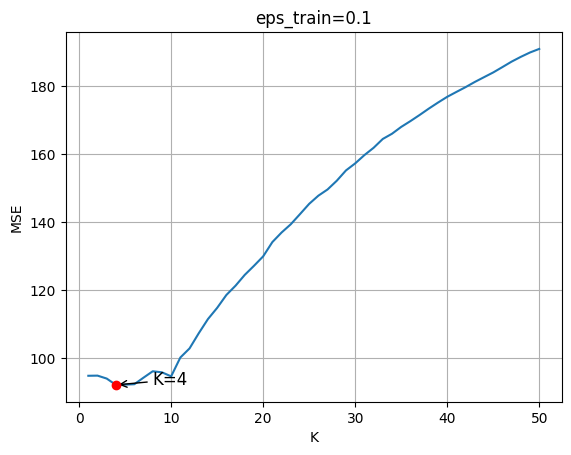

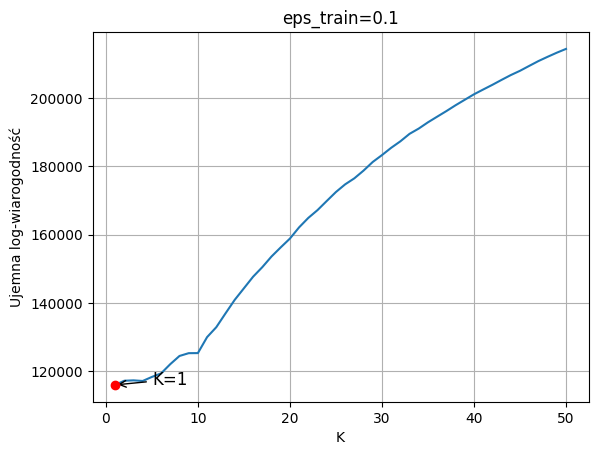

0.2
Min loss function value=  82288.21696607936
Min MSE =  33.745401335641084
K (mse) =  10
K (loss) =  10


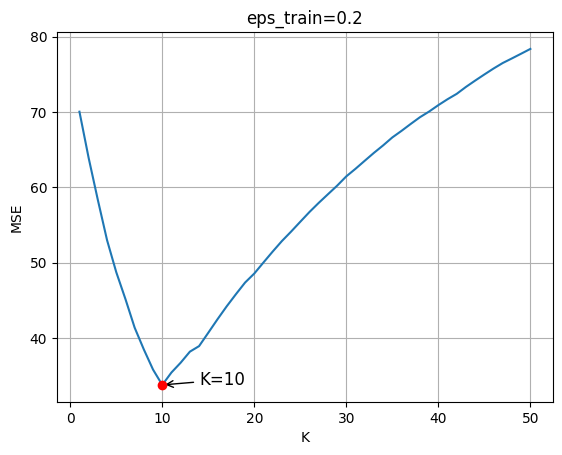

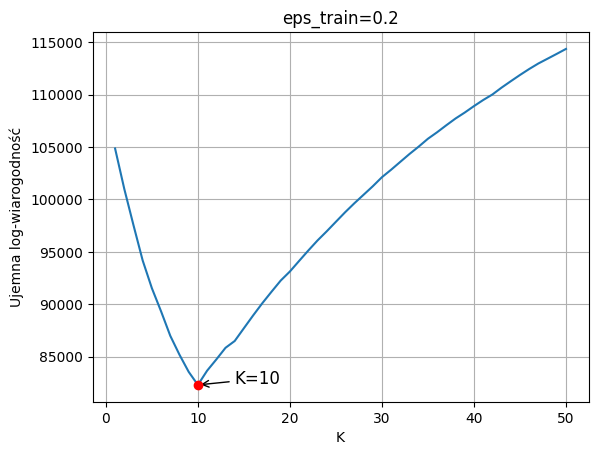

0.30000000000000004
Min loss function value=  75470.53548422983
Min MSE =  23.045387825859915
K (mse) =  10
K (loss) =  10


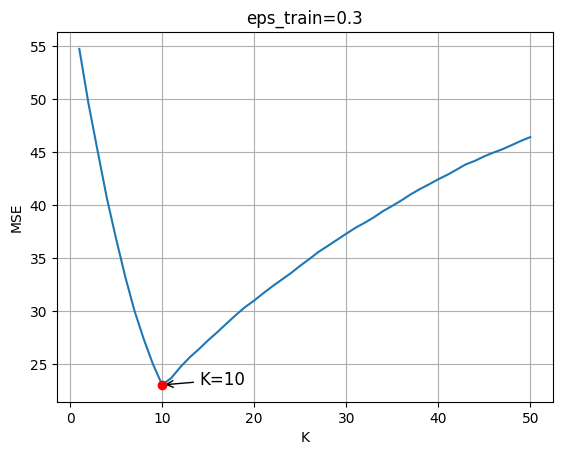

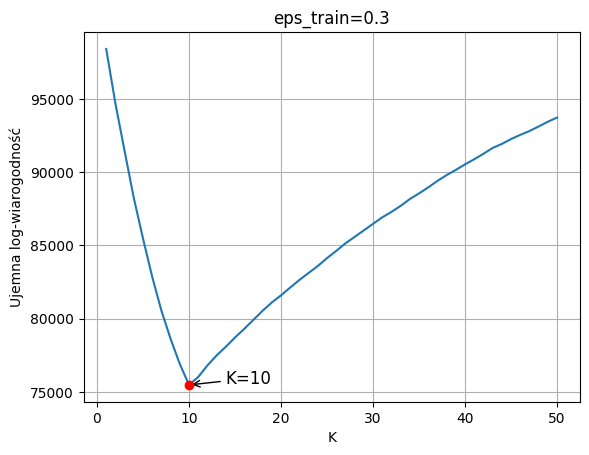

0.4
Min loss function value=  71720.51494070026
Min MSE =  17.770236926202866
K (mse) =  10
K (loss) =  10


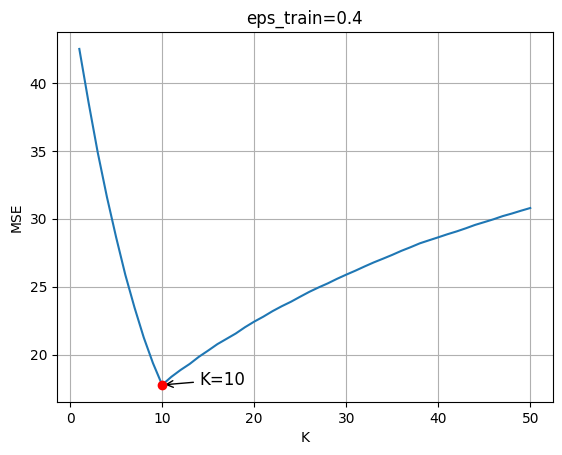

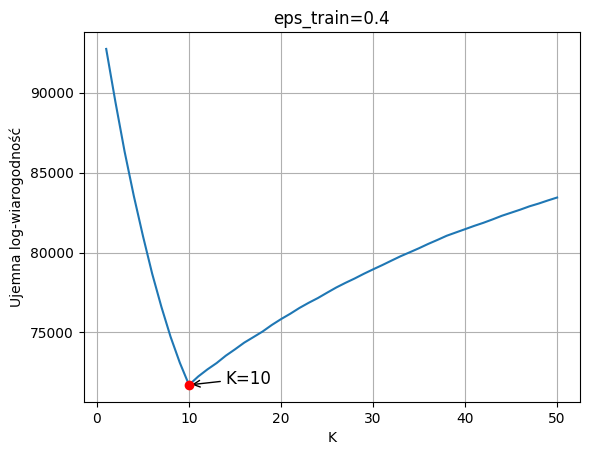

0.5
Min loss function value=  68426.06255010661
Min MSE =  13.814889843328736
K (mse) =  10
K (loss) =  10


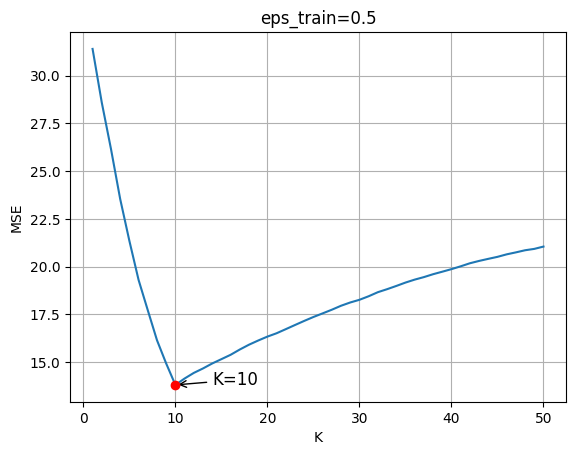

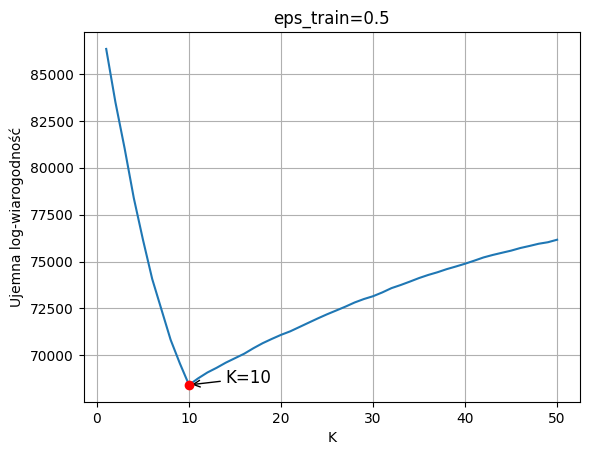

0.6
Min loss function value=  64732.33850442359
Min MSE =  10.371143031500646
K (mse) =  10
K (loss) =  10


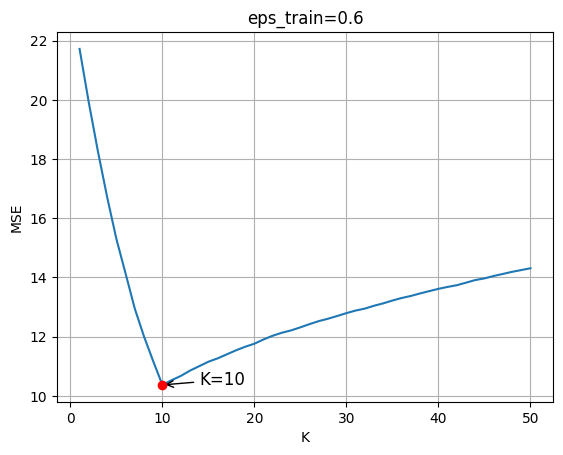

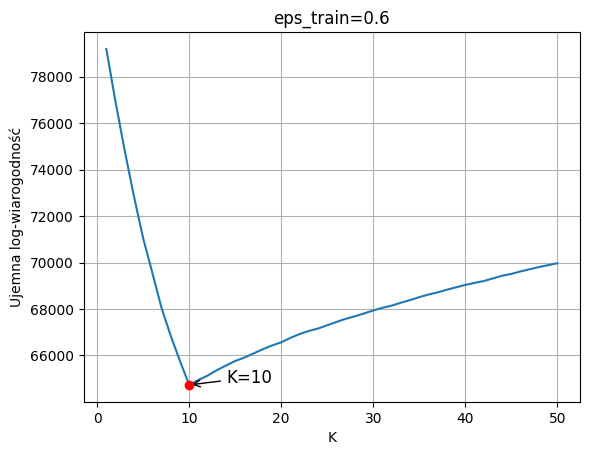

0.7000000000000001
Min loss function value=  78463.91566105207
Min MSE =  7.632414205007654
K (mse) =  10
K (loss) =  10


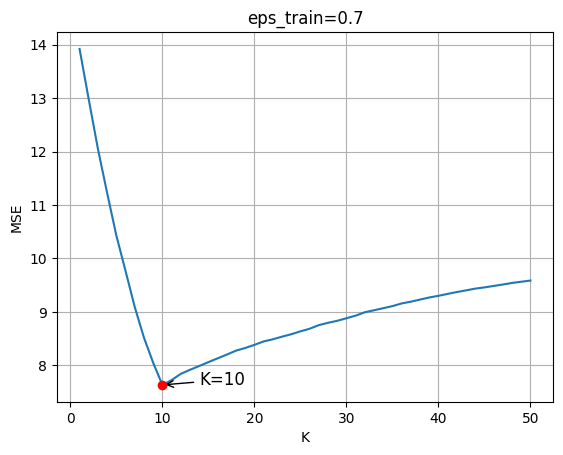

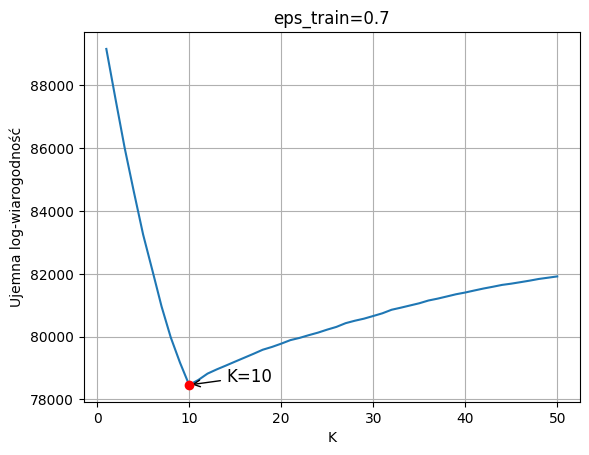

0.8
Min loss function value=  72646.88150927794
Min MSE =  4.9132634673034525
K (mse) =  10
K (loss) =  10


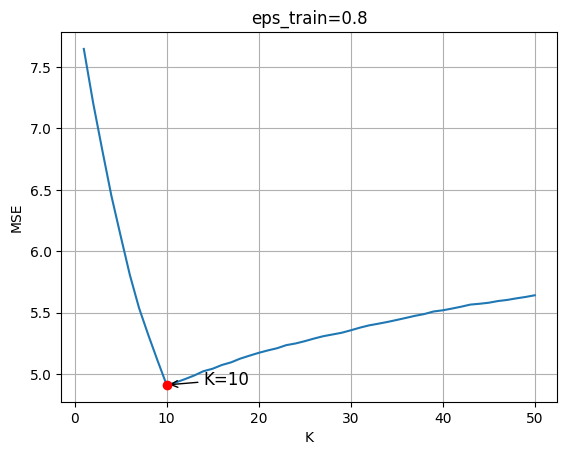

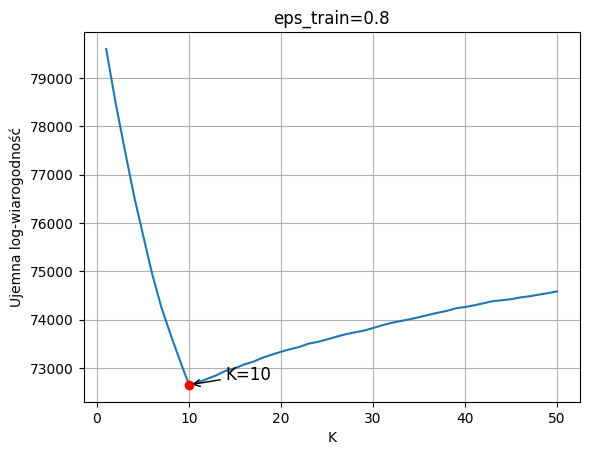

0.9
Min loss function value=  62985.603439973456
Min MSE =  2.4127007369926163
K (mse) =  10
K (loss) =  10


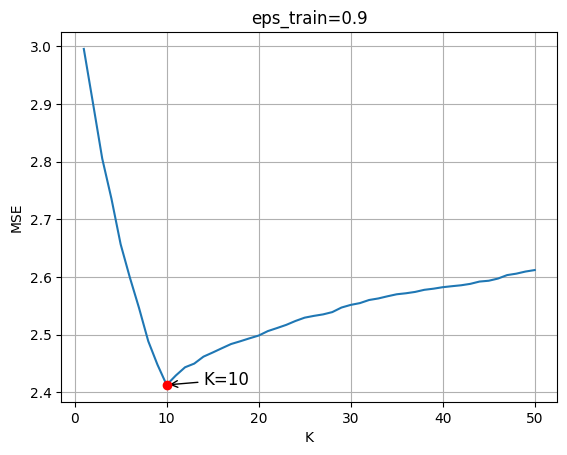

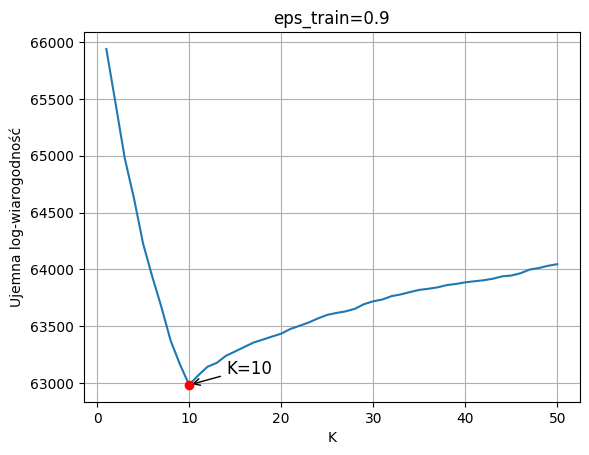

In [11]:
#Rysunki 6.1, 6.5, 6.7: wybrane wartości parametru eps, kod wywoływany kilkukrotnie ze zmianami wartości prawdziwego K oraz zmianami wartości na diagonali macierzy D


epsilons = np.arange(0.1, 1, 0.1)

for i in range(len(epsilons)):
    print(epsilons[i])
    minimizing_loss(eps=epsilons[i], n=250, d=100, K=10)
    

#### Metoda naiwna: użycie tych samych danych do estymacji parametrów i do ewaluacji (policzenia funkcji straty)



In [13]:
#Rysunek 6.4

#metoda naiwna

from scipy.stats import ortho_group
from scipy.special import expit


n = 250
d = 100
K = 20

def minimizing_loss_naive(n, d, K=10):
    diag_values = np.arange(5,5+K,1)
    D = np.diag(diag_values)

    nPC = K

    U = randortho_subset(n, nPC)
    V = randortho_subset(d, nPC)
    theta = U @ D @ V.T
    p = expit(theta)

    X = np.zeros((n, d))

    r = 100
    X.flat = np.random.binomial(r, p.flat, size=n*d)

    svd_matrix = np.zeros(X.shape)

    for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                svd_matrix[i,j] = logit((X[i,j]+0.001)/(r+0.002))

    U, D, Vt = np.linalg.svd(svd_matrix)

    D = np.diag(D) 

    p_k = 0
    mse_values = []
    loss_function_values = []

    for k in range(1, 51):
        U_k = U[:, :k]
        D_k = D[:k, :k]
        Vt_k = Vt[:k, :]

        p_k = expit(U_k @ D_k @ Vt_k)


        

        suma = 0
        #for k in range(50):
        for i in range(X.shape[0]):
                for j in range(X.shape[1]):
                    suma = suma + (X[i,j] - r*p_k[i,j])**2
        mse_values.append(suma/(n*d))
        suma = 0
        
        loss_function_values.append(negative_log_likelihood(X=X, r=r, p=p_k))

    
    min_mse = min(mse_values)
    min_loss = min(loss_function_values)

    print("Min loss function value= ", min_loss)
    print("Min MSE = ", min_mse)

    print("K (mse) = ", np.where(np.array(mse_values) == min_mse)[0][0]+1) #+1 bo indeksy byly od 0, a k bylo od 1
    print("K (loss) = ", np.where(np.array(loss_function_values) == min_loss)[0][0]+1)



    k_mse = np.where(np.array(mse_values) == min_mse)[0][0] + 1 
    k_loss = np.where(np.array(loss_function_values) == min_loss)[0][0] + 1

    plt.plot(range(1, 51), mse_values)  
    plt.scatter(k_mse, min_mse, color='red', zorder=5)  
    plt.annotate(f'K={k_mse}', xy=(k_mse, min_mse), xytext=(k_mse+1, min_mse+3), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)  
    plt.xlabel('K')
    plt.ylabel('MSE')
    #plt.title(f'eps_train={np.round(eps_train, 2)}')
    plt.grid(True)
    plt.show()

    plt.plot(range(1, 51), loss_function_values)
    plt.scatter(k_loss, min_loss, color='red', zorder=5) 
    plt.annotate(f'K={k_loss}', xy=(k_loss, min_loss), xytext=(k_loss+1, min_loss+300), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
    plt.xlabel('K')
    plt.ylabel('Ujemna log-wiarogodność')
    #plt.title(f'eps_train={np.round(eps_train, 2)}')
    plt.grid(True)
    plt.show()




Min loss function value=  66194.16603134885
Min MSE =  6.230979373425869
K (mse) =  50
K (loss) =  50


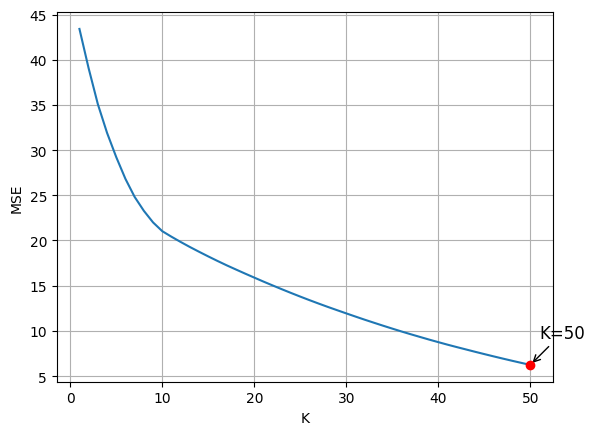

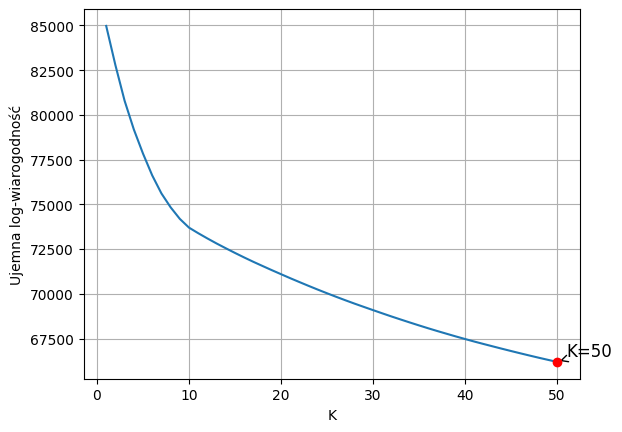

In [14]:
minimizing_loss_naive(n, d, K=10)

#### Wielokrotne przerzedzanie danych (kroswalidacja)

In [15]:
eps = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
r = 100
X.shape
eps*r

array([20., 20., 20., 20., 20.])

In [16]:
X = X.astype(int)

rng = np.random.default_rng()

output_matrix = np.empty_like(X, dtype=object)

def multifold_binomial_thinning(r, eps, X):
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            nsample = X[i, j] 
            #nsample = len(eps)
            colors = (eps * r).astype(int)
            result = rng.multivariate_hypergeometric(colors=colors, nsample=nsample, size=1)
            output_matrix[i, j] = result

    return output_matrix

output_matrix = multifold_binomial_thinning(r = r, eps = eps, X = X)
print(output_matrix.shape)
output_matrix

(250, 100)


array([[array([[7, 8, 8, 7, 7]], dtype=int64),
        array([[12, 14, 14, 11,  9]], dtype=int64),
        array([[10,  5,  8,  7,  9]], dtype=int64), ...,
        array([[ 9, 15, 12,  7,  9]], dtype=int64),
        array([[2, 3, 5, 6, 8]], dtype=int64),
        array([[11,  8, 10,  5,  8]], dtype=int64)],
       [array([[11, 11, 12, 15, 11]], dtype=int64),
        array([[ 7,  7,  7, 10, 10]], dtype=int64),
        array([[ 6,  8, 10,  7,  9]], dtype=int64), ...,
        array([[ 8,  8, 11,  7, 12]], dtype=int64),
        array([[11, 11, 13, 12, 14]], dtype=int64),
        array([[12, 16, 16, 17, 14]], dtype=int64)],
       [array([[8, 6, 7, 6, 8]], dtype=int64),
        array([[5, 3, 7, 5, 6]], dtype=int64),
        array([[ 6,  8,  3,  8, 11]], dtype=int64), ...,
        array([[11, 11, 12,  9, 13]], dtype=int64),
        array([[13, 13,  6,  7, 16]], dtype=int64),
        array([[ 7, 10, 11, 10,  9]], dtype=int64)],
       ...,
       [array([[17, 18, 19, 13, 17]], dtype=int64),
  

In [17]:
def create_zero_matrices(M, X):
    return [np.zeros(X.shape) for _ in range(M)]

In [18]:
M = 5
X_all = create_zero_matrices(M, X)

#for m in range(M):
  #  for k in range(X.shape[0]):
    #    for l in range(X.shape[1]):
      #      X_all[m][k,l] = output_matrix[k][l][0][m]


In [19]:
from collections import Counter
def most_common_value(lst):
    
    counter = Counter(lst)
    
    most_common_element, count = counter.most_common(1)[0]
    
    return most_common_element

In [25]:
#Rysunki 6.2, 6.3, 6.6, 6.8 (wykres dotyczący MSE): kod wywoływany kilkukrotnie ze zmianami wartości parametru eps, zmianami wartości prawdziwego K oraz zmianami wartości na diagonali macierzy D

#zamkniecie poprzednich krokow w jednej funkcji: data_thinning

from scipy.stats import ortho_group
from scipy.special import expit
from collections import Counter


n = 250
d = 100
M = 5
K = 20 #prawdziwe K


def minimizing_mse_multifold(M = 5, eps = [0.2, 0.2, 0.2, 0.2, 0.2], n=150, d=100, X = X):

    X_all = create_zero_matrices(M = M, X = X)

    diag_values = np.arange(5,5+K,1)
    D = np.diag(diag_values)

    nPC = K

    U = randortho_subset(n, nPC)
    V = randortho_subset(d, nPC)
    theta = U @ D @ V.T
    p = expit(theta)

    X = np.zeros((n, d))

    r = 100
    X.flat = np.random.binomial(r, p.flat, size=n*d)

    #X_thinned = multifold_binomial_thinning(r = r, eps = eps, X = X)
    #mse_values_folds = []
    colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink',
    'brown', 'grey', 'lime', 'indigo', 'teal', 'violet', 'gold', 'navy',
    'crimson', 'olive'
    ]
    selected_K = []

    plt.figure()
    plt.xlabel('K')
    plt.ylabel('MSE')
    plt.grid(True)
    #plt.show()

    for m in range(M):

        for k in range(X.shape[0]):
            for l in range(X.shape[1]):
                X_all[m][k,l] = output_matrix[k][l][0][m]

    for m in range(M):

        
        matrices_to_add = [X_all[mm] for mm in range(M) if mm != m]
        
        sum_matrix = sum(matrices_to_add)


        X_train = sum_matrix

        X_test = X_all[m]

        eps_test = eps[m]
        eps_train = 1 - eps_test

        svd_matrix = np.zeros(X_train.shape)

        for i in range(X_train.shape[0]):
                for j in range(X_train.shape[1]):
                    svd_matrix[i,j] = logit((X_train[i,j]+0.001)/(eps_train*r+0.002))

        U, D, Vt = np.linalg.svd(svd_matrix)

        D = np.diag(D) 

        p_k = 0

        suma = 0
        mse_values = []
        

        for k in range(1, 51):
            U_k = U[:, :k]
            D_k = D[:k, :k]
            Vt_k = Vt[:k, :]

            p_k = expit(U_k @ D_k @ Vt_k)


            for i in range(X_test.shape[0]):
                for j in range(X_test.shape[1]):
                    suma = suma + (X_test[i,j] - eps_test*r*p_k[i,j])**2
            mse_values.append(suma/(n*d))
            suma = 0
        
            

        
        min_mse = min(mse_values)
        

        selected_K.append(np.where(np.array(mse_values) == min_mse)[0][0]+1)


        plt.plot(range(1, 51), mse_values, color=colors[m % len(colors)], label=f'm={m+1}, K_min={np.where(np.array(mse_values) == min_mse)[0][0]+1}')
    
    plt.legend()
    plt.title(f'eps_train={np.round(eps, 2)}')
    plt.show()
    best_K = most_common_value(selected_K)

    #min_mse = min(mse_values_folds)
    #print("Min MSE = ", min_mse)
    print("Best K =", best_K) #+1 bo indeksy byly od 0, a k bylo od 1


    

    return 


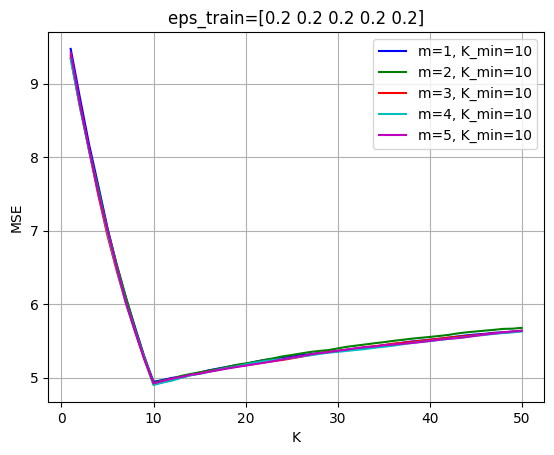

Best K = 10


In [26]:
minimizing_mse_multifold(M = 5, eps = [0.2, 0.2, 0.2, 0.2, 0.2], n=250, d=100)

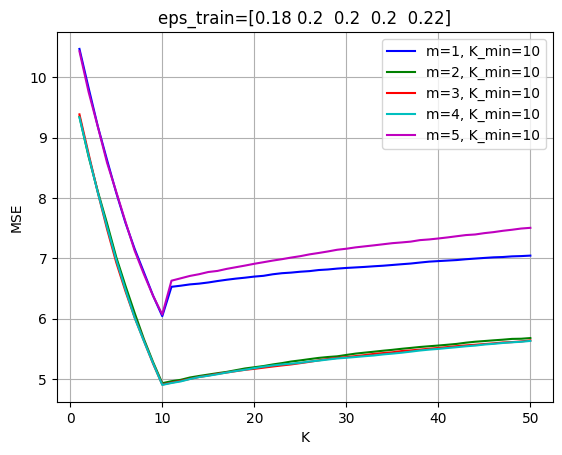

Best K = 10


In [27]:
minimizing_mse_multifold(M = 5, eps = [0.18, 0.2, 0.2, 0.2, 0.22], n=250, d=100)

In [28]:
#Rysunki 6.2, 6.3, 6.6, 6.8 (wykres dotyczący ujemnej log-wiarogodności): kod wywoływany kilkukrotnie ze zmianami wartości parametru eps, zmianami wartości prawdziwego K oraz zmianami wartości na diagonali macierzy D

#zamkniecie poprzednich krokow w jednej funkcji: data_thinning

from scipy.stats import ortho_group
from scipy.special import expit
from collections import Counter


n = 250
d = 100
M = 5
K = 10 #prawdziwe K


def minimizing_loss_multifold(M = 5, eps = [0.2, 0.2, 0.2, 0.2, 0.2], n=250, d=100, X = X):

    X_all = create_zero_matrices(M = M, X = X)

    diag_values = np.arange(5,5+K,1)
    D = np.diag(diag_values)

    nPC = K

    U = randortho_subset(n, nPC)
    V = randortho_subset(d, nPC)
    theta = U @ D @ V.T
    p = expit(theta)

    X = np.zeros((n, d))

    r = 100
    X.flat = np.random.binomial(r, p.flat, size=n*d)

    #X_thinned = multifold_binomial_thinning(r = r, eps = eps, X = X)
    #mse_values_folds = []
    colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink',
    'brown', 'grey', 'lime', 'indigo', 'teal', 'violet', 'gold', 'navy',
    'crimson', 'olive'
    ]
    selected_K = []

    plt.figure()
    plt.xlabel('K')
    plt.ylabel('Ujemna log-wiarogodność')
    plt.grid(True)
    #plt.show()

    for m in range(M):

        for k in range(X.shape[0]):
            for l in range(X.shape[1]):
                X_all[m][k,l] = output_matrix[k][l][0][m]

    for m in range(M):

        
        matrices_to_add = [X_all[mm] for mm in range(M) if mm != m]
        
        sum_matrix = sum(matrices_to_add)


        X_train = sum_matrix

        X_test = X_all[m]

        eps_test = eps[m]
        eps_train = 1 - eps_test

        svd_matrix = np.zeros(X_train.shape)

        for i in range(X_train.shape[0]):
                for j in range(X_train.shape[1]):
                    svd_matrix[i,j] = logit((X_train[i,j]+0.001)/(eps_train*r+0.002))

        U, D, Vt = np.linalg.svd(svd_matrix)

        D = np.diag(D) 

        p_k = 0

        suma = 0
        
        loss_function_values = []

        for k in range(1, 51):
            U_k = U[:, :k]
            D_k = D[:k, :k]
            Vt_k = Vt[:k, :]

            p_k = expit(U_k @ D_k @ Vt_k)


        
            loss_function_values.append(negative_log_likelihood(X=X_test, r=r*eps_test, p=p_k))

        
        #min_mse = min(mse_values)
        min_loss = min(loss_function_values)

        #mse_values_folds.append(np.mean(mse_values))
        selected_K.append(np.where(np.array(loss_function_values) == min_loss)[0][0]+1)


        plt.plot(range(1, 51), loss_function_values, color=colors[m % len(colors)], label=f'm={m+1}, K_min={np.where(np.array(loss_function_values) == min_loss)[0][0]+1}')
  
    
    plt.legend()
    plt.title(f'eps_train={np.round(eps, 2)}')
    plt.show()
    best_K = most_common_value(selected_K)

    print("Best K =", best_K) #+1 bo indeksy byly od 0, a k bylo od 1


    

    return 



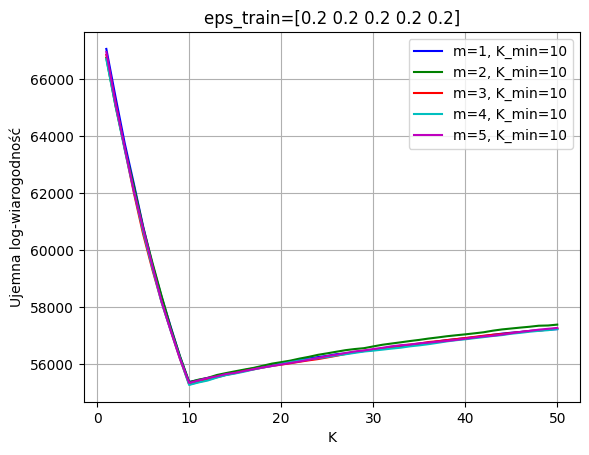

Best K = 10


In [29]:
minimizing_loss_multifold(M = 5, eps = [0.2, 0.2, 0.2, 0.2, 0.2], n=250, d=100, X = X)

# Wybór liczby skupień w danych pochodzących z rozkładu Gamma

In [136]:
l = 20 #lambda
theta = np.array([[0.5,5], [5,0.5], [10,10], [0.5,0.5]]) #zakladamy, ze sa 4 klastry
scale = 1.0 / theta
d = 2
K_true = 4
n = 100*K_true
c_i = np.arange(1, K_true+1, 1)

true_clusters  = np.tile(c_i, 100) 

#cel: estymacja K

X = np.zeros((n,d))

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        cluster_index = true_clusters[i] - 1
        X[i,j] = np.random.gamma(shape = l, scale = 1/theta[cluster_index, j], size=None)

X

array([[56.06039425,  4.62423328],
       [ 3.75727513, 38.00995695],
       [ 1.01857627,  1.43553955],
       [43.55585242, 40.24543335],
       [27.46839162,  3.69202286],
       [ 3.57491155, 37.16134201],
       [ 2.41554643,  1.64602858],
       [27.54897308, 27.64208052],
       [36.17406719,  2.72312205],
       [ 4.57686566, 46.43926549],
       [ 1.67825659,  1.9114731 ],
       [38.13306004, 40.94418305],
       [44.80667973,  3.59539763],
       [ 4.69516263, 39.80806789],
       [ 1.43783903,  1.52562786],
       [36.09205871, 40.66725535],
       [34.74194263,  4.81419992],
       [ 4.90491475, 29.73652685],
       [ 2.0847719 ,  1.3785811 ],
       [21.7340231 , 39.26697295],
       [27.25380125,  5.89686132],
       [ 3.18049071, 48.96516326],
       [ 1.74972903,  2.40973183],
       [41.58296347, 48.84540885],
       [49.73263198,  4.01600511],
       [ 3.39623198, 44.82104913],
       [ 1.55419081,  2.11444457],
       [29.42119505, 30.33682361],
       [40.11198961,

In [131]:
def gamma_thinning(x, eps, alpha):
  if isinstance(x, float):
    z = np.random.beta(a = eps*alpha, b = (1-eps)*alpha, size = 1)
    x1 = x*z
  else:
    z = np.random.beta(a = eps*alpha, b = (1-eps)*alpha, size = len(x))
    x1 = x*z
  x2 = x - x1
  return x1, x2

In [132]:
#https://repositorio.usp.br/directbitstream/9752a53a-2b98-4a18-8e9d-a0955bfd9629/2931339_postprint.pdf - wzory na estymatory alpha i beta

def estimates_corrected(X):
    n = X.shape[0]
    p = X.shape[1]
    alpha = [0 for _ in range(p)]
    beta = [0 for _ in range(p)]

    sums_list = []
    log_sums_list = []
    x_log_x_sums_list = []

    for col in range(X.shape[1]):
        column_sum = np.sum(X[:, col])
        sums_list.append(column_sum)
        
        log_column_sum = np.sum(np.log(X[:, col] + 1e-20))
        log_sums_list.append(log_column_sum)
   
        x_log_x_sum = np.sum(X[:, col] * np.log(X[:, col] + 1e-20))
        x_log_x_sums_list.append(x_log_x_sum)

    for j in range(X.shape[1]):
        denominator_alpha = (n + 2) * ((n * x_log_x_sums_list[j]) - (sums_list[j] * log_sums_list[j]))
        denominator_beta = n * (n - 1)
        
        if denominator_alpha != 0:
            alpha[j] = ((n - 1) * n * sums_list[j]) / denominator_alpha
        else:
            alpha[j] = 1000000  

        if denominator_beta != 0:
            beta[j] = ((n * x_log_x_sums_list[j]) - (sums_list[j] * log_sums_list[j])) / denominator_beta
        else:
            beta[j] = 1000000  

    theta = [1/x for x in beta]

    return alpha, theta


import scipy.stats as stats
def negative_log_likelihood_gamma(x, l, theta):
    #pdf = np.log(stats.gamma.pdf(x, a=l, scale=theta))
    pdf = -np.log(stats.gamma.pdf(x, a=l, scale=1/theta)+1e-10)
    return pdf



In [137]:
#Rysunek 6.9: wybrane wartości parametru eps

from sklearn.cluster import KMeans

def gamma_clusters(K_max = 10, eps_train = 0.8, X = X):
    eps_test = 1 - eps_train
    X_train = np.zeros_like(X)
    X_test = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X_train[i,j], X_test[i,j] = gamma_thinning(x=X[i,j], eps=eps_train, alpha=l)
    
   
    mse_values = []
    loss_function_values = []
    for K in range(1, K_max+1, 1):

       
        kmeans = KMeans(n_clusters = K, random_state=0)

        kmeans.fit(X_train)

        c_hat = kmeans.labels_ + 1 #wyestymowane klastry: plus 1, zeby indeksowanie klastrów było od 0 a nie od 1


        unique_clusters = np.unique(c_hat)
        clusters_dict = {c: [] for c in unique_clusters}

        for i in range(X.shape[0]):
            cluster = c_hat[i]
            clusters_dict[cluster].append(X_train[i, :])

        clusters_lists = {c: np.array(cluster) for c, cluster in clusters_dict.items() if len(cluster) > 0}

        unique_clusters = np.unique(c_hat)
        estimated_betas = {c: None for c in unique_clusters}
        estimated_alphas = {c: None for c in unique_clusters}

                
        estimated_betas = {}
        estimated_alphas = {}

        for c in unique_clusters:
            if c in clusters_lists:
                estimated_alphas[c], estimated_betas[c] = estimates_corrected(X=clusters_lists[c])

        
        suma = 0
        suma_loss = 0

        for c in unique_clusters:
            
            for i in range(X_test.shape[0]):
                for j in range(X_test.shape[1]):
                    if c_hat[i] == c:
                        
                        #suma = suma + (X_test[i, j] - ((eps_test*estimated_alphas[c][j])/(eps_train*estimated_betas[c][j])))**2 #estymacja alpha
                        suma = suma + (X_test[i, j] - ((eps_test*l)/(eps_train*estimated_betas[c][j])))**2
                        #suma = suma + (X_test[i, j] - ((eps_test*l*estimated_betas[c][j])/(eps_train)))**2 
                        


                        #suma_loss = suma_loss + negative_log_likelihood_gamma(x=X_test[i,j], l=(eps_test*estimated_alphas[c][j])/eps_train, theta=estimated_betas[c][j]) #estymacja alpha
                        suma_loss = suma_loss + negative_log_likelihood_gamma(x=X_test[i,j], l=eps_test*l/eps_train, theta=estimated_betas[c][j])
                        #suma_loss = suma_loss + negative_log_likelihood_gamma(x=X_test[i,j], l=eps_test*l/eps_train, theta=1/estimated_betas[c][j])

        mse_values.append(suma / (n * d))

        loss_function_values.append(suma_loss)

    min_mse = min(mse_values)
    #min_mse_index = np.where(np.isclose(mse_values, min_mse))[0][0] + 1
    #print("isclose: ", min_mse_index)
    
    print("Min MSE = ", min_mse)
    print("K (MSE) = ", np.where(np.array(mse_values) == min_mse)[0][0]+1) #+1 bo indeksy byly od 0, a k bylo od 1

    min_loss = min(loss_function_values)
    print("Min loss function value = ", min_loss)
    print("K (loss function) = ", np.where(np.array(loss_function_values) == min_loss)[0][0]+1) #+1 bo indeksy byly od 0, a k bylo od 1



    k_mse = np.where(np.array(mse_values) == min_mse)[0][0] + 1 
    k_loss = np.where(np.array(loss_function_values) == min_loss)[0][0] + 1

    plt.plot(range(1, K_max+1), mse_values)  
    plt.scatter(k_mse, min_mse, color='red', zorder=5) 
    plt.annotate(f'K={k_mse}', xy=(k_mse, min_mse), xytext=(k_mse, min_mse), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)  
    plt.xlabel('K')
    plt.ylabel('MSE')
    plt.title(f'eps_train={np.round(eps_train, 2)}')
    plt.grid(True)
    plt.show()

    plt.plot(range(1, K_max+1), loss_function_values)
    plt.scatter(k_loss, min_loss, color='red', zorder=5) 
    plt.annotate(f'K={k_loss}', xy=(k_loss, min_loss), xytext=(k_loss, min_loss), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
    plt.xlabel('K')
    plt.ylabel('Ujemna log-wiarogodność')
    plt.title(f'eps_train={np.round(eps_train, 2)}')
    plt.grid(True)
    plt.show()

    

0.1
Min MSE =  1206.9663487541832
K (MSE) =  1
Min loss function value =  14293.401126308321
K (loss function) =  1


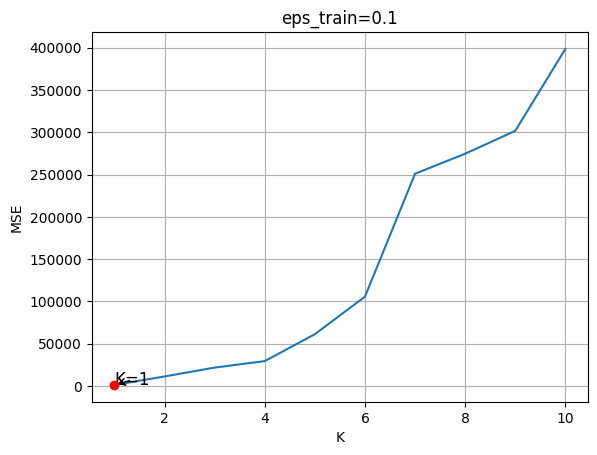

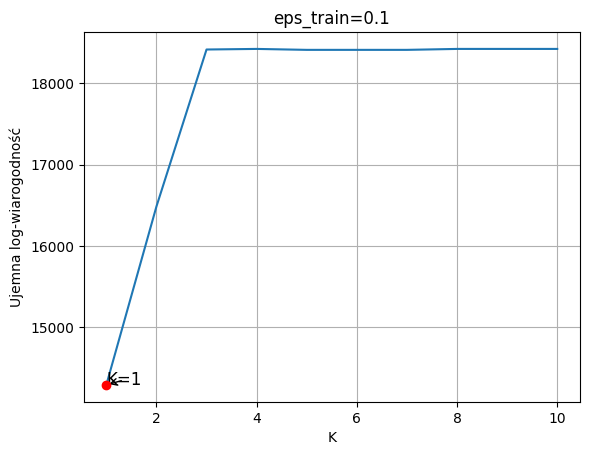

0.2
Min MSE =  253.75208304061474
K (MSE) =  1
Min loss function value =  15045.358920185165
K (loss function) =  3


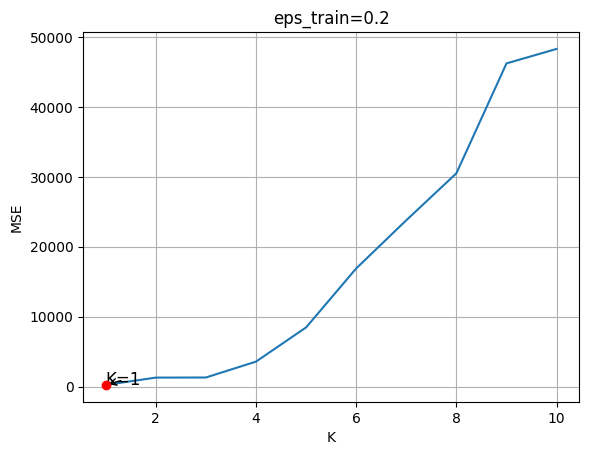

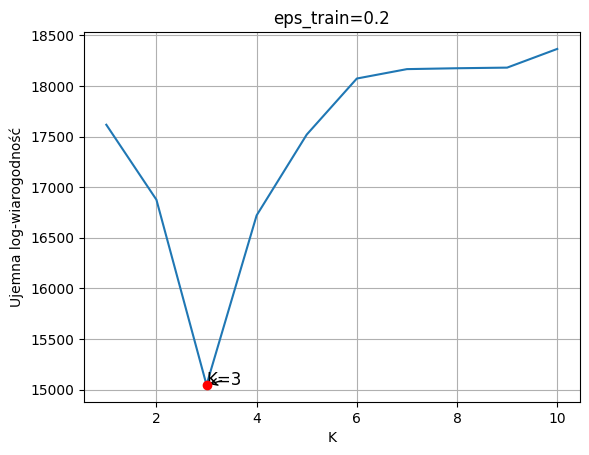

0.30000000000000004
Min MSE =  267.60281303342634
K (MSE) =  3
Min loss function value =  11452.929853745509
K (loss function) =  4


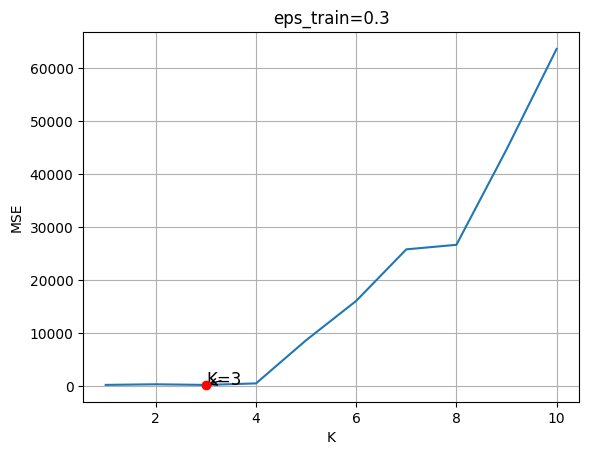

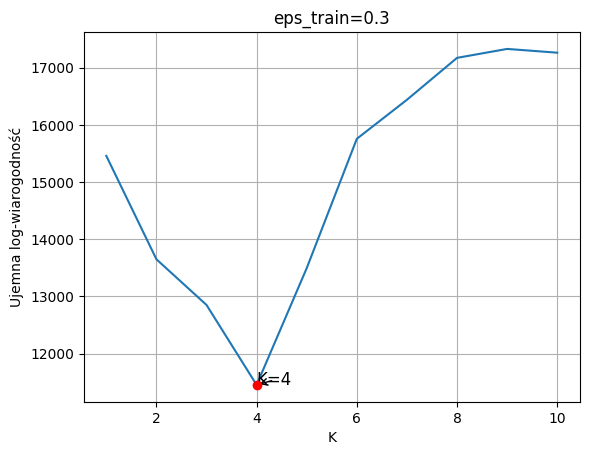

0.4
Min MSE =  123.33204734284129
K (MSE) =  3
Min loss function value =  10340.755817871608
K (loss function) =  3


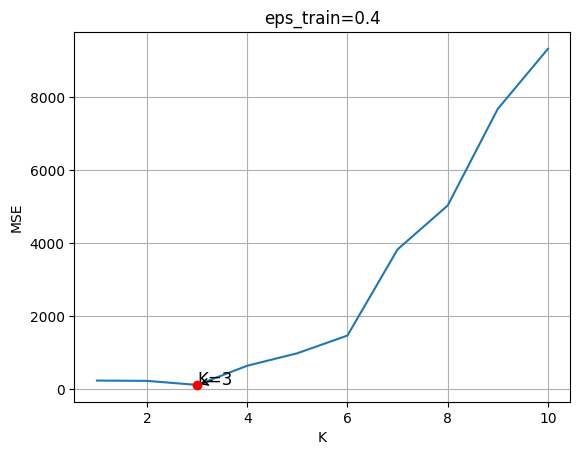

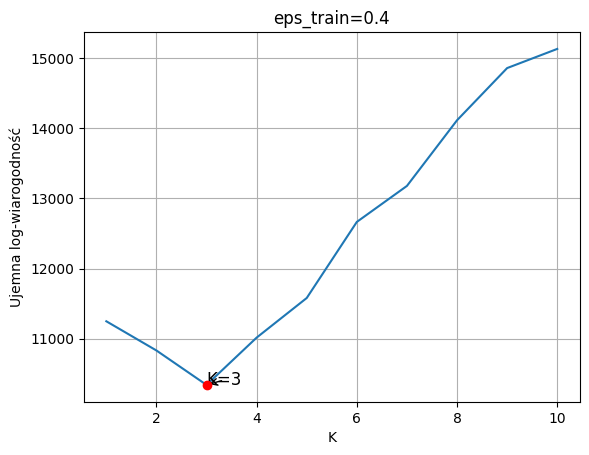

0.5
Min MSE =  106.92916913485288
K (MSE) =  3
Min loss function value =  9048.49300803861
K (loss function) =  3


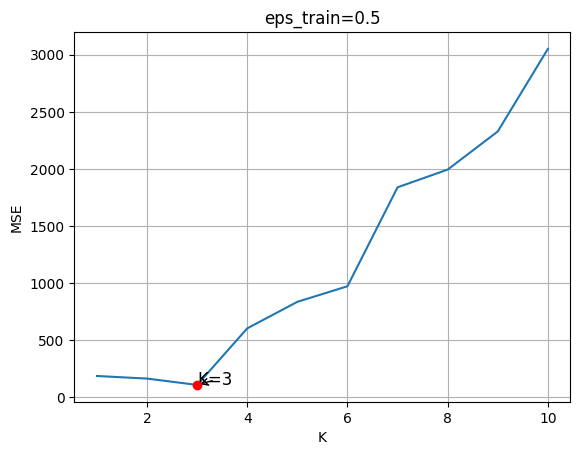

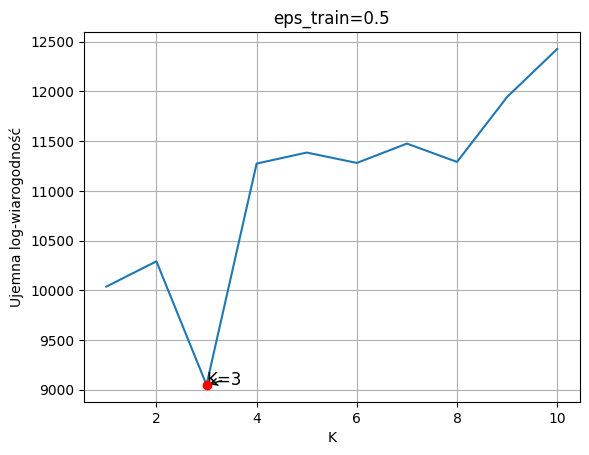

0.6
Min MSE =  114.6875393833221
K (MSE) =  3
Min loss function value =  9115.302117473166
K (loss function) =  3


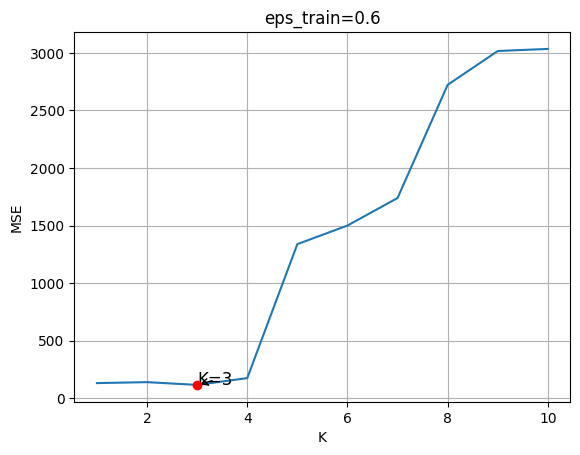

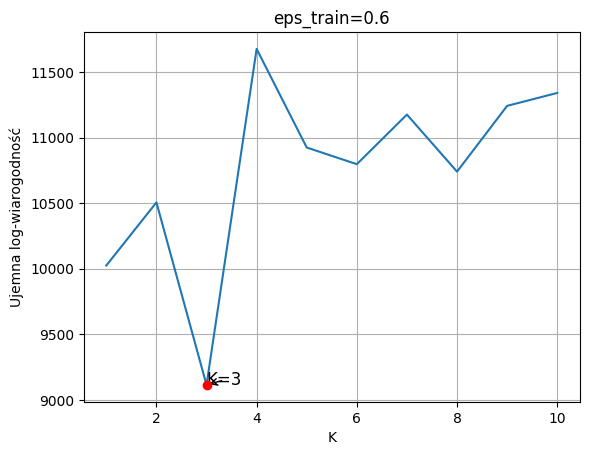

0.7000000000000001
Min MSE =  60.784567439861824
K (MSE) =  3
Min loss function value =  7476.49777839934
K (loss function) =  3


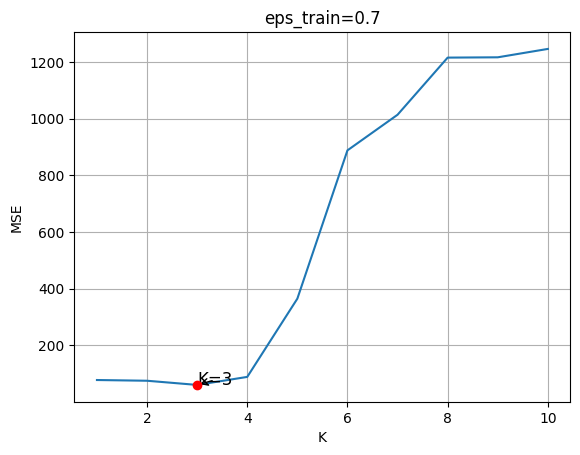

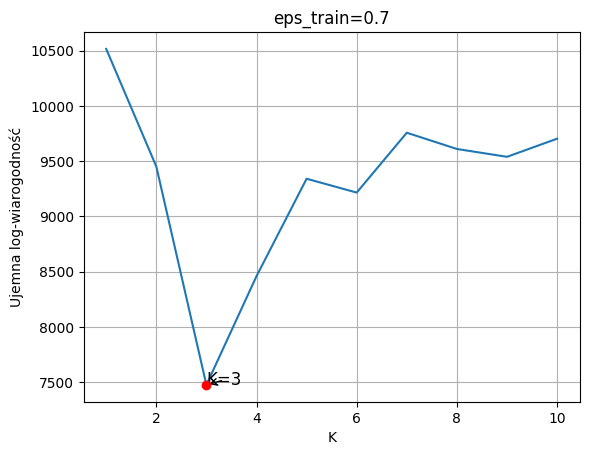

0.8
Min MSE =  38.46042428838115
K (MSE) =  2
Min loss function value =  6080.4067311238405
K (loss function) =  3


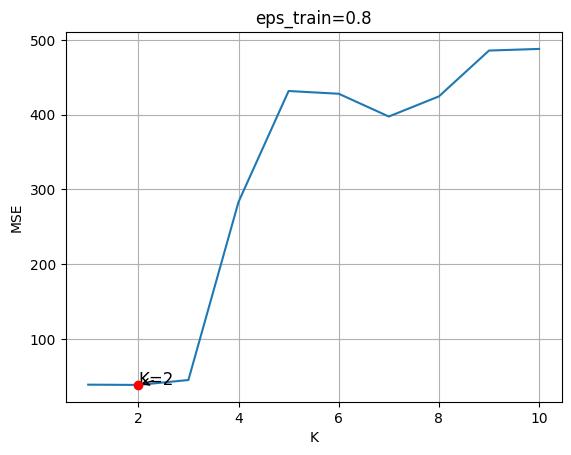

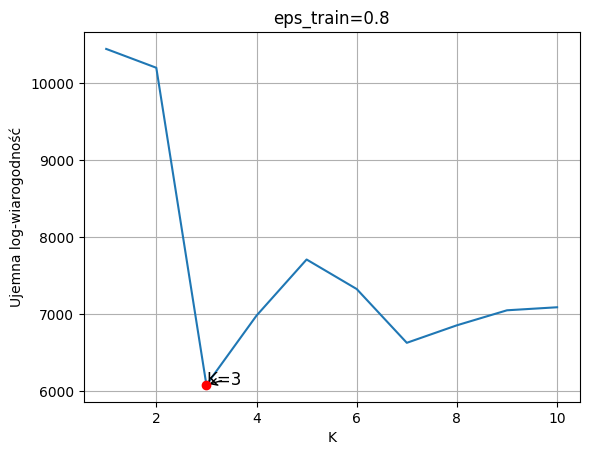

0.9
Min MSE =  10.179284413730265
K (MSE) =  3
Min loss function value =  3012.672413349822
K (loss function) =  8


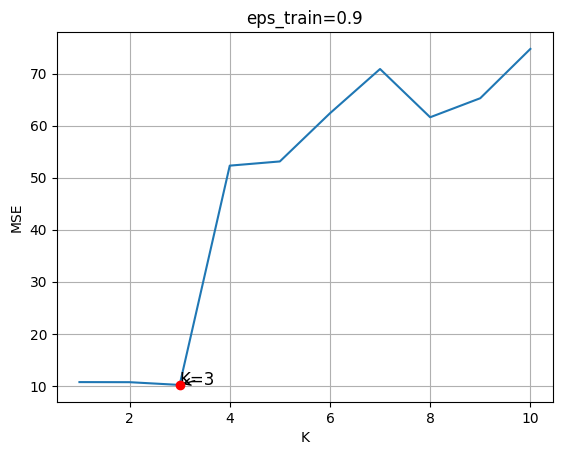

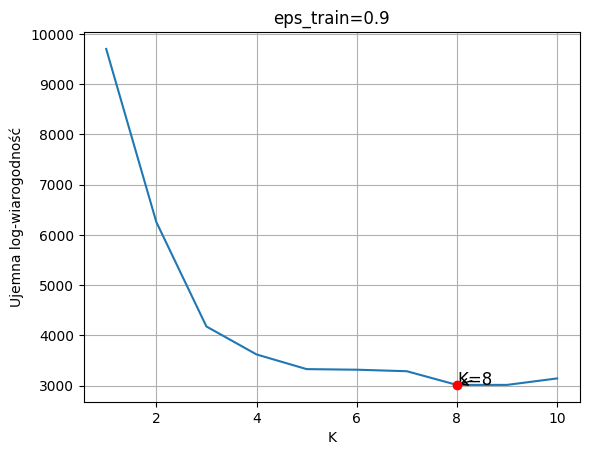

In [138]:
epsilons = np.arange(0.1, 1, 0.1)

for i in range(len(epsilons)):
    print(epsilons[i])
    gamma_clusters(K_max = 10, eps_train = epsilons[i], X = X)

In [39]:
#Liczności wybieranych K dla 200 różnych wygenerowanych zbiorów

from sklearn.cluster import KMeans

def mean_gamma_clusters(liczba_zbiorow = 100, K_max = 10, eps_train = 0.8, l = 20):

    theta = np.array([[0.5, 5], [5, 0.5], [10, 10], [0.5, 0.5]]) 
    scale = 1.0 / theta 
    d = 2
    K_true = 4
    n = 100 * K_true
    c_i = np.arange(1, K_true + 1, 1)

    # Generate true clusters
    true_clusters = np.tile(c_i, 100)

    eps_test = 1 - eps_train
    best_K_all_mse = []
    best_K_all_loss = []

    for ll in range(liczba_zbiorow):

        X = np.zeros((n,d))

        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                cluster_index = true_clusters[i] - 1
                shape = l
                scale_value = scale[cluster_index, j]

                if scale_value > 0:  # Ensure scale is positive
                    X[i, j] = np.random.gamma(shape=shape, scale=scale_value, size=None)
                else:
                    print(f"Invalid scale value: {scale_value}")


    
        X_train = np.zeros_like(X)
        X_test = np.zeros_like(X)

        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                X_train[i,j], X_test[i,j] = gamma_thinning(x=X[i,j], eps=eps_train, alpha=l)
        
    
        mse_values = []
        loss_function_values = []
        for K in range(1, K_max+1, 1):

        
            kmeans = KMeans(n_clusters = K, random_state=2024)

            kmeans.fit(X_train)

            c_hat = kmeans.labels_ + 1 #wyestymowane klastry: plus 1, zeby indeksowanie klastrów było od 0 a nie od 1


            unique_clusters = np.unique(c_hat)
            clusters_dict = {c: [] for c in unique_clusters}

            for i in range(X.shape[0]):
                cluster = c_hat[i]
                clusters_dict[cluster].append(X_train[i, :]) 

            clusters_lists = {c: np.array(cluster) for c, cluster in clusters_dict.items() if len(cluster) > 0}

            unique_clusters = np.unique(c_hat)
            estimated_betas = {c: None for c in unique_clusters}
            estimated_alphas = {c: None for c in unique_clusters}

                    
            estimated_betas = {}
            estimated_alphas = {}

            for c in unique_clusters:
                if c in clusters_lists:
                    estimated_alphas[c], estimated_betas[c] = estimates_corrected(X=clusters_lists[c])


            
            suma = 0
            suma_loss = 0
            

            for c in unique_clusters:
            #mse_values = []
                
                for i in range(X_test.shape[0]):
                    for j in range(X_test.shape[1]):
                        if c_hat[i] == c:
                            
                            suma = suma + (X_test[i, j] - ((eps_test*estimated_alphas[c][j])/(eps_train*estimated_betas[c][j])))**2 #estymacja alpha+beta
                            #suma = suma + (X_test[i, j] - ((eps_test*l)/(eps_train*estimated_betas[c][j])))**2
                            #suma = suma + (X_test[i, j] - ((eps_test*l)/(estimated_betas[c][j])))**2 
                            


                            suma_loss = suma_loss + negative_log_likelihood_gamma(x=X_test[i,j], l=(eps_test*estimated_alphas[c][j])/eps_train, theta=estimated_betas[c][j]) #estymacja alpha+beta
                            #suma_loss = suma_loss + negative_log_likelihood_gamma(x=X_test[i,j], l=eps_test*l/eps_train, theta=estimated_betas[c][j])
                            #suma_loss = suma_loss + negative_log_likelihood_gamma(x=X_test[i,j], l=eps_test*l, theta=estimated_betas[c][j])
                            

            mse_values.append(suma / (n * d))

            loss_function_values.append(suma_loss)

        min_mse = min(mse_values)
       
        min_loss = min(loss_function_values)

        k_mse = np.where(np.array(mse_values) == min_mse)[0][0] + 1 
        k_loss = np.where(np.array(loss_function_values) == min_loss)[0][0] + 1

        best_K_all_mse.append(k_mse)
        best_K_all_loss.append(k_loss)

    return best_K_all_mse, best_K_all_loss

    

In [41]:
import warnings
warnings.filterwarnings("ignore")

best_K_all_mse, best_K_all_loss = mean_gamma_clusters(liczba_zbiorow = 100, K_max = 10, eps_train = 0.4)

In [203]:
print(np.unique(best_K_all_loss))
print(np.unique(best_K_all_mse))

[6 7 8 9]
[ 5  7  8  9 10]


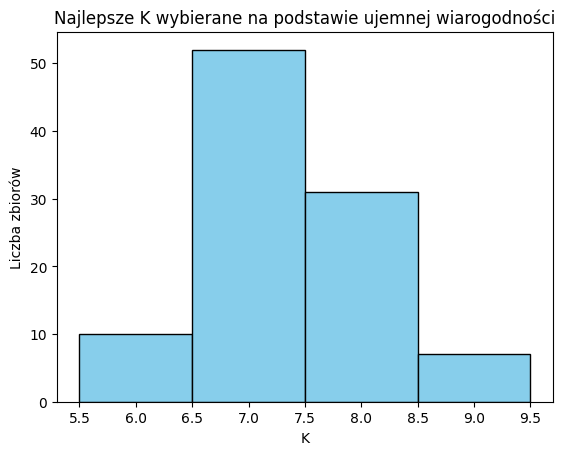

In [204]:
bins = [x - 0.5 for x in range(min(best_K_all_loss), max(best_K_all_loss) + 2) ]

plt.hist(best_K_all_loss, bins = bins, align='mid', color='skyblue', edgecolor='black')

plt.title('Najlepsze K wybierane na podstawie ujemnej wiarogodności')
plt.xlabel('K')
plt.ylabel('Liczba zbiorów')
plt.show()

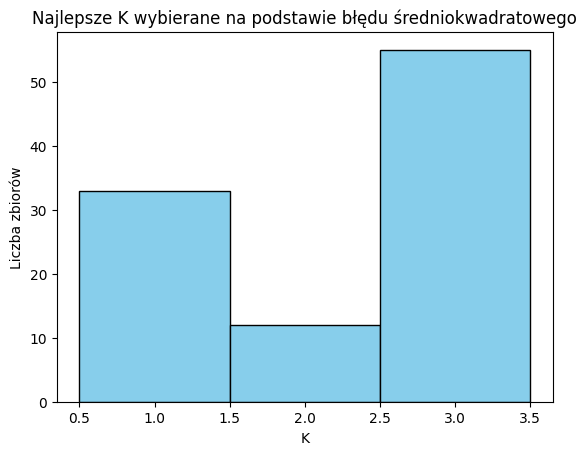

In [200]:
bins = [x - 0.5 for x in range(min(best_K_all_mse), max(best_K_all_mse) + 2) ]

plt.hist(best_K_all_mse, bins = bins, align='mid', color='skyblue', edgecolor='black')

plt.title('Najlepsze K wybierane na podstawie błędu średniokwadratowego')
plt.xlabel('K')
plt.ylabel('Liczba zbiorów')
plt.show()

esp =  0.1


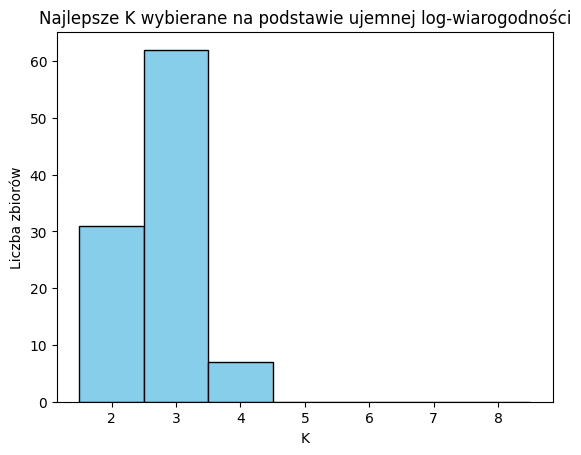

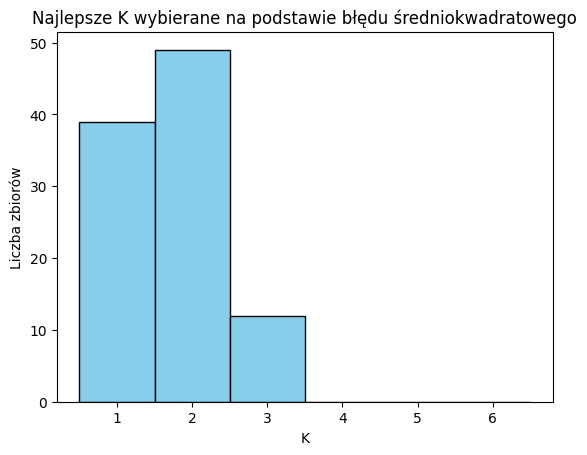

esp =  0.2


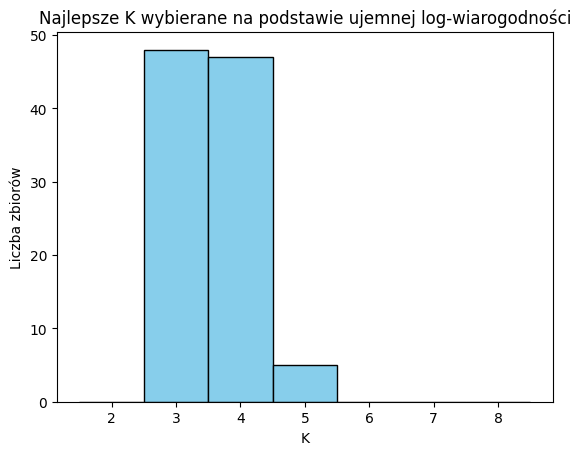

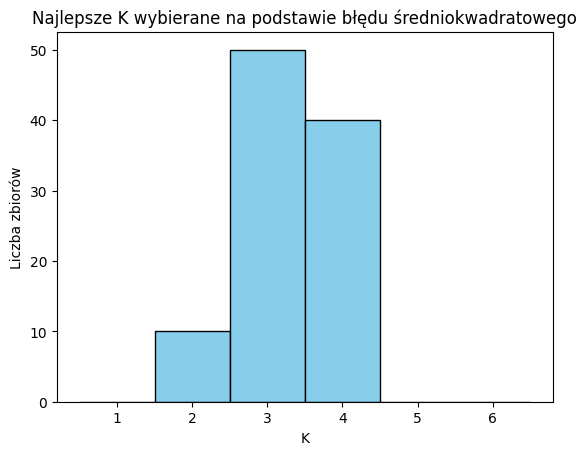

esp =  0.30000000000000004


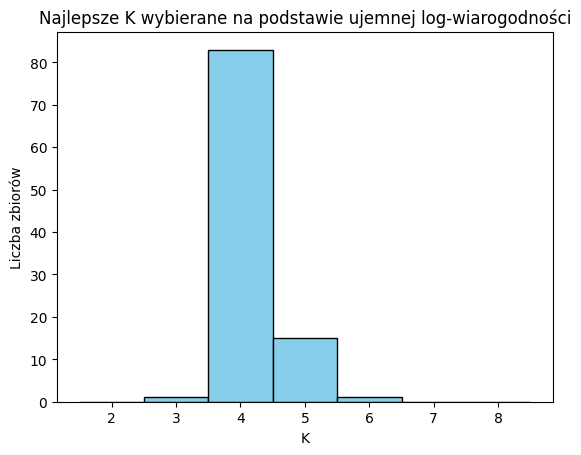

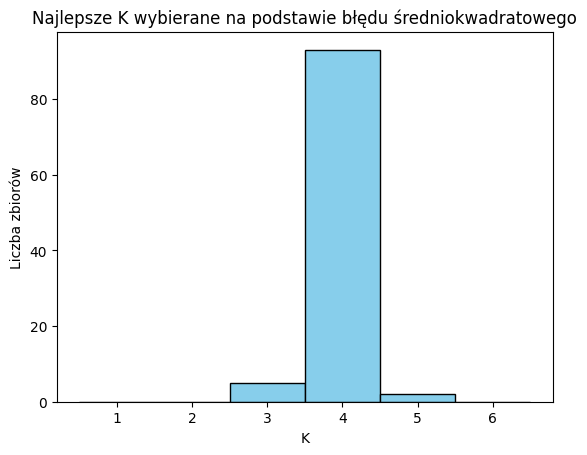

esp =  0.4


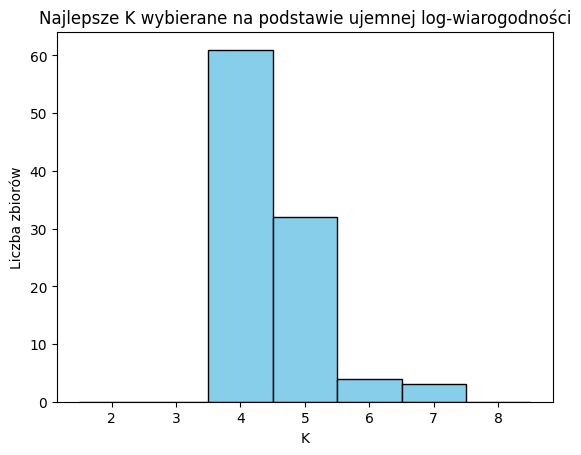

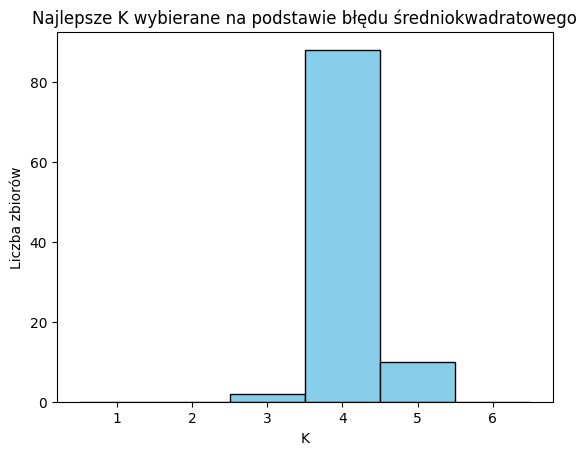

esp =  0.5


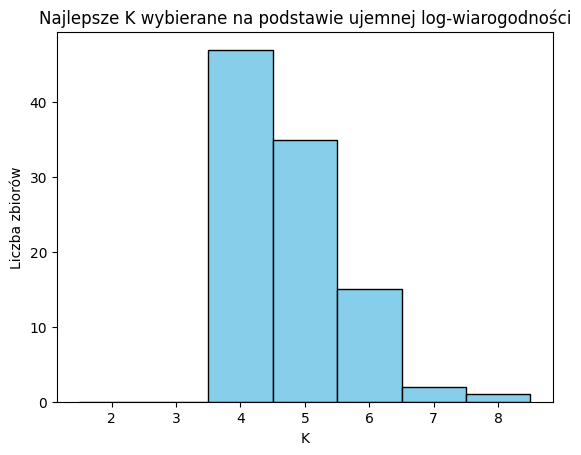

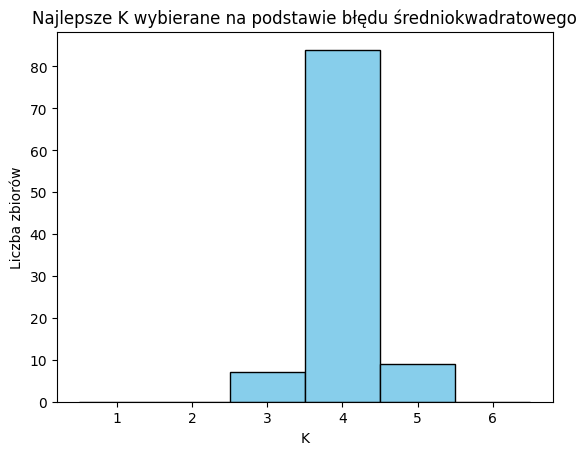

esp =  0.6


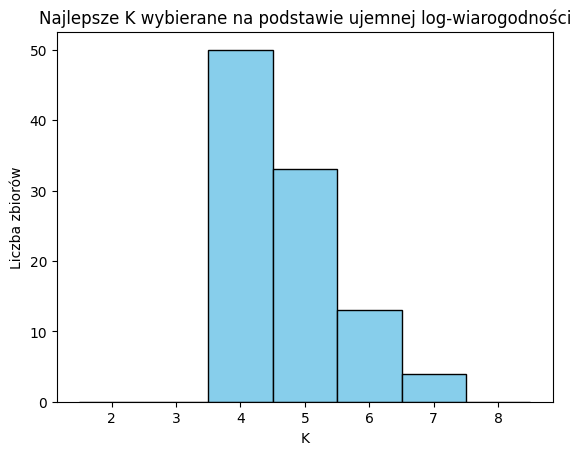

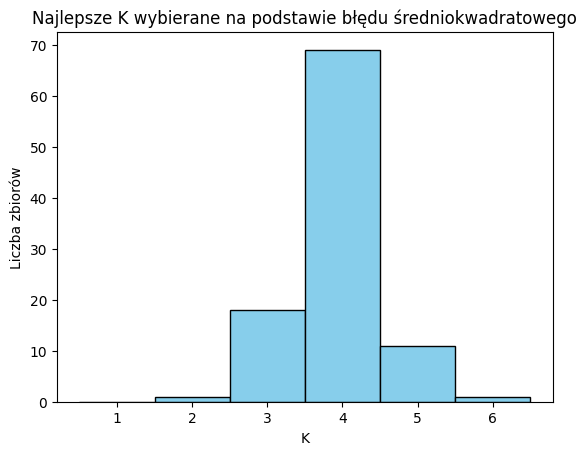

esp =  0.7000000000000001


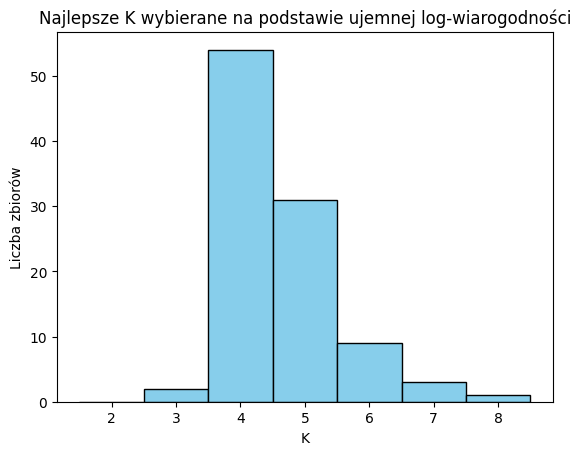

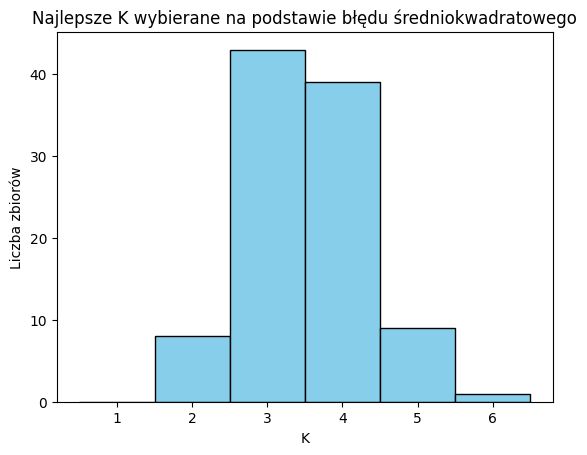

esp =  0.8


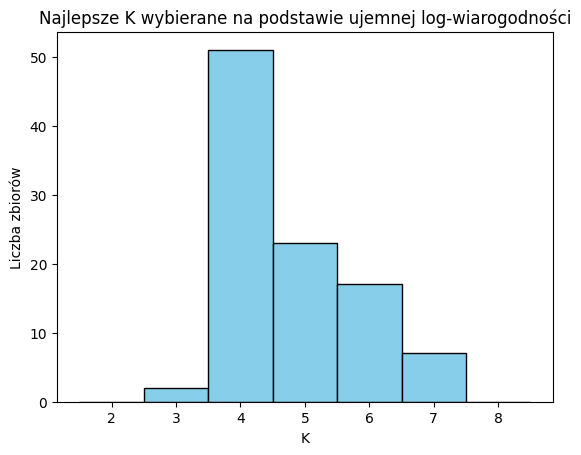

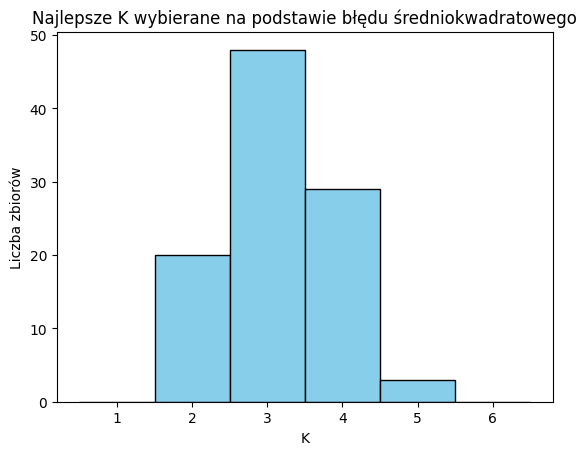

esp =  0.9


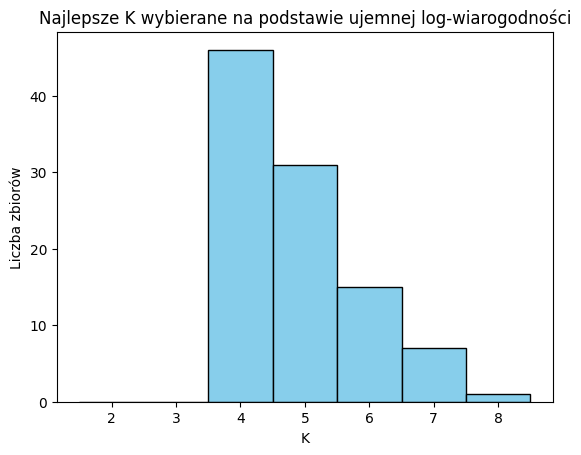

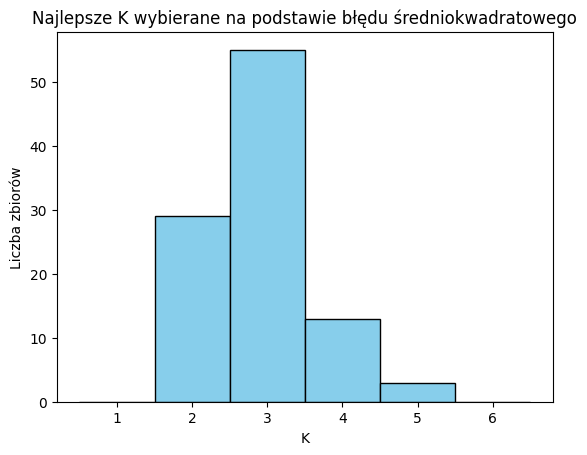

In [19]:
#Rysunek 6.13: kod wywoływany kilkukrotnie ze zmianami liczby generowanych zbiorów

epsilons = np.arange(0.1, 1, 0.1)

global_min_loss = float('inf')
global_max_loss = float('-inf')
global_min_mse = float('inf')
global_max_mse = float('-inf')

for eps in epsilons:
    best_K_all_mse, best_K_all_loss = mean_gamma_clusters(liczba_zbiorow=200, K_max=10, eps_train=eps)
    if min(best_K_all_loss) < global_min_loss:
        global_min_loss = min(best_K_all_loss)
    if max(best_K_all_loss) > global_max_loss:
        global_max_loss = max(best_K_all_loss)
    if min(best_K_all_mse) < global_min_mse:
        global_min_mse = min(best_K_all_mse)
    if max(best_K_all_mse) > global_max_mse:
        global_max_mse = max(best_K_all_mse)


bins_loss = [x - 0.5 for x in range(global_min_loss, global_max_loss + 2)]
bins_mse = [x - 0.5 for x in range(global_min_mse, global_max_mse + 2)]


for eps in epsilons:
    print("esp = ", eps)
    
    best_K_all_mse, best_K_all_loss = mean_gamma_clusters(liczba_zbiorow=100, K_max=10, eps_train=eps)
    
    # Ujemna log-wiarogodność
    plt.hist(best_K_all_loss, bins=bins_loss, align='mid', color='skyblue', edgecolor='black')
    plt.title('Najlepsze K wybierane na podstawie ujemnej log-wiarogodności')
    plt.xlabel('K')
    plt.ylabel('Liczba zbiorów')
    plt.xticks(range(global_min_loss, global_max_loss + 1))
    plt.show()
    
    # MSE
    plt.hist(best_K_all_mse, bins=bins_mse, align='mid', color='skyblue', edgecolor='black')
    plt.title('Najlepsze K wybierane na podstawie błędu średniokwadratowego')
    plt.xlabel('K')
    plt.ylabel('Liczba zbiorów')
    plt.xticks(range(global_min_mse, global_max_mse + 1))
    plt.show()


In [12]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

best_K_all_mse, best_K_all_loss = mean_gamma_clusters(liczba_zbiorow=200, K_max=10, eps = [0.2, 0.4, 0.6, 0.8])

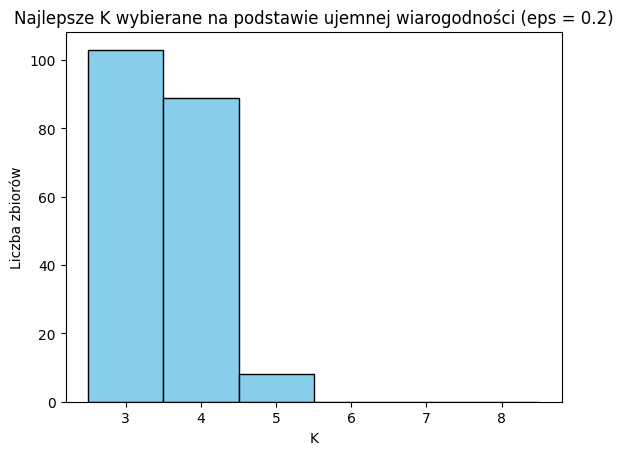

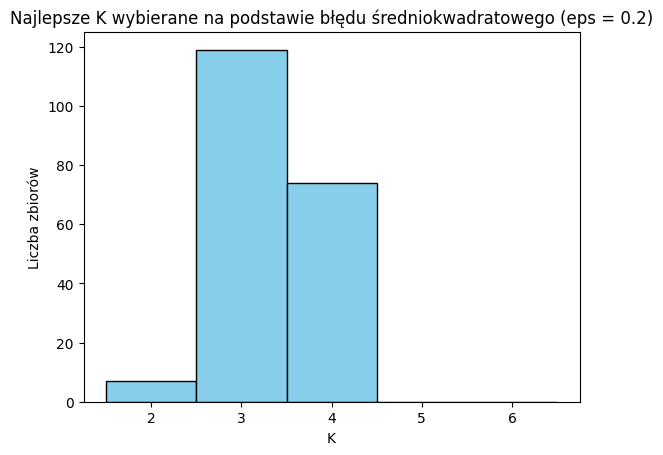

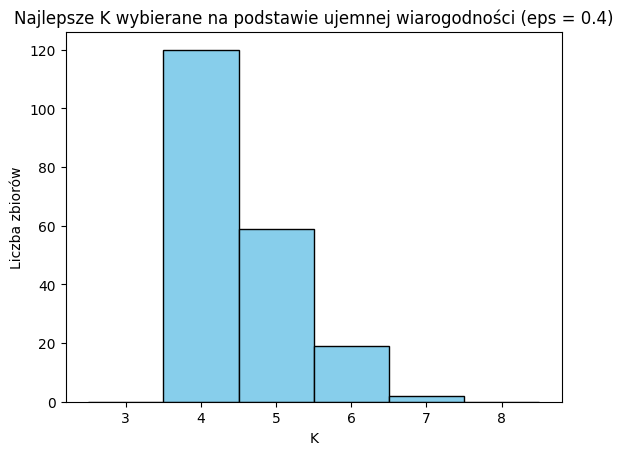

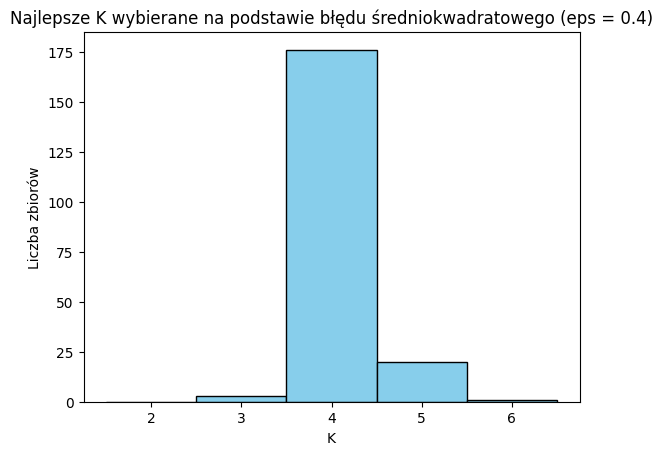

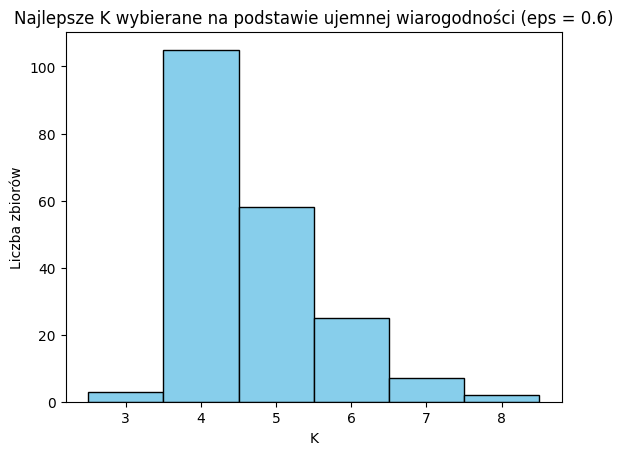

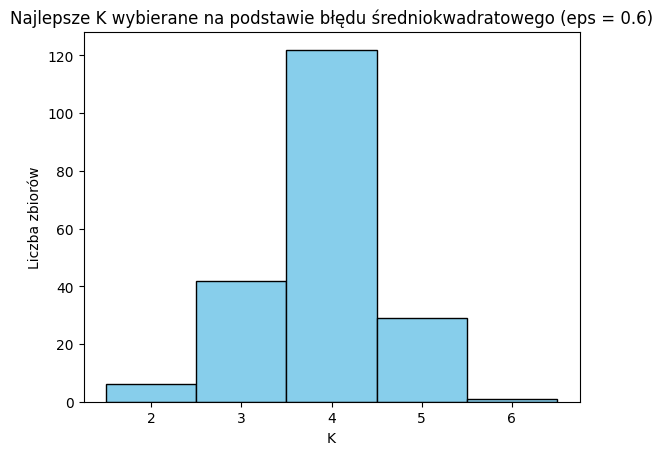

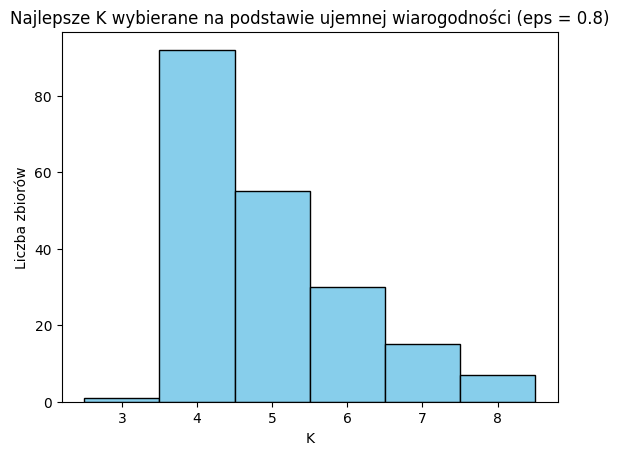

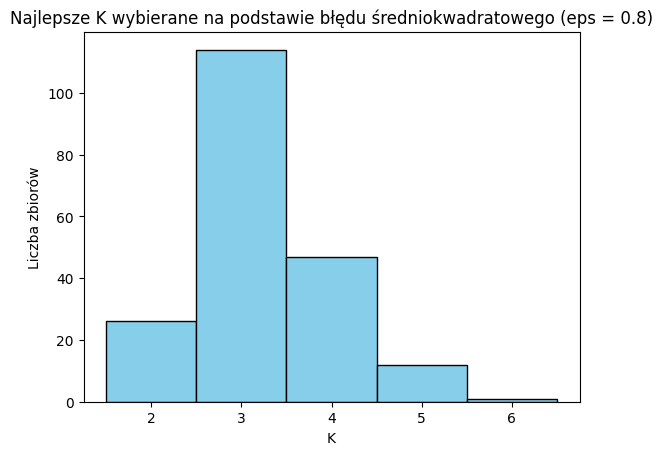

In [13]:
epsilons = [0.2, 0.4, 0.6, 0.8]

global_min_loss = float('inf')
global_max_loss = float('-inf')
global_min_mse = float('inf')
global_max_mse = float('-inf')

for sublist in best_K_all_loss:
    if min(sublist) < global_min_loss:
        global_min_loss = min(sublist)
    if max(sublist) > global_max_loss:
        global_max_loss = max(sublist)

for sublist in best_K_all_mse:
    if min(sublist) < global_min_mse:
        global_min_mse = min(sublist)
    if max(sublist) > global_max_mse:
        global_max_mse = max(sublist)

bins_loss = [x - 0.5 for x in range(global_min_loss, global_max_loss + 2)]
bins_mse = [x - 0.5 for x in range(global_min_mse, global_max_mse + 2)]

base_titles = ['Najlepsze K wybierane na podstawie ujemnej wiarogodności (eps = {eps})', 
               'Najlepsze K wybierane na podstawie błędu średniokwadratowego (eps = {eps})']

for idx, (loss_list, mse_list) in enumerate(zip(best_K_all_loss, best_K_all_mse)):
    eps = epsilons[idx] 
    
    plt.hist(loss_list, bins=bins_loss, align='mid', color='skyblue', edgecolor='black')
    plt.title(base_titles[0].format(eps=eps))
    plt.xlabel('K')
    plt.ylabel('Liczba zbiorów')
    plt.xticks(range(global_min_loss, global_max_loss + 1))
    plt.show()
    
    plt.hist(mse_list, bins=bins_mse, align='mid', color='skyblue', edgecolor='black')
    plt.title(base_titles[1].format(eps=eps))
    plt.xlabel('K')
    plt.ylabel('Liczba zbiorów')
    plt.xticks(range(global_min_mse, global_max_mse + 1))
    plt.show()


### Metoda naiwna

In [54]:
#Rysunek 6.12

#Metoda naiwna - bez podziału na zbiór treningowy i testowy
from sklearn.cluster import KMeans

def gamma_clusters_naive(K_max = 10, X = X):    
   
    mse_values = []
    loss_function_values = []
    for K in range(1, K_max+1, 1):
       
        kmeans = KMeans(n_clusters = K, random_state=0)

        kmeans.fit(X)

        c_hat = kmeans.labels_ + 1 #wyestymowane klastry: plus 1, zeby indeksowanie klastrów było od 0 a nie od 1

        unique_clusters = np.unique(c_hat)
        clusters_dict = {c: [] for c in unique_clusters}

        for i in range(X.shape[0]):
            cluster = c_hat[i]
            clusters_dict[cluster].append(X[i, :])

        clusters_lists = {c: np.array(cluster) for c, cluster in clusters_dict.items() if len(cluster) > 0}

        unique_clusters = np.unique(c_hat)
        estimated_betas = {c: None for c in unique_clusters}
        estimated_alphas = {c: None for c in unique_clusters}

                
        estimated_betas = {}
        estimated_alphas = {}

        for c in unique_clusters:
            if c in clusters_lists:
                estimated_alphas[c], estimated_betas[c] = estimates_corrected(X=clusters_lists[c])

        
        suma = 0
        suma_loss = 0
        for c in unique_clusters:
        #mse_values = []
            
            for i in range(X.shape[0]):
                for j in range(X.shape[1]):
                    if c_hat[i] == c:
                        suma = suma + (X[i,j] - estimated_alphas[c][j] / estimated_betas[c][j])**2 #estymacja alpha
                        #suma = suma + (X[i, j] - l/estimated_betas[c][j])**2

                        suma_loss = suma_loss + negative_log_likelihood_gamma(x=X[i,j], l=estimated_alphas[c][j], theta=estimated_betas[c][j]) #estymacja alpha
                        #suma_loss = suma_loss + negative_log_likelihood_gamma(x=X[i,j], l=l, theta=estimated_betas[c][j])


        mse_values.append(suma / (n * d))

        loss_function_values.append(suma_loss)

        
        
    min_mse = min(mse_values)
    print("Min MSE = ", min_mse)
    print("K (MSE) = ", np.where(np.array(mse_values) == min_mse)[0][0]+1) #+1 bo indeksy byly od 0, a k bylo od 1

    min_loss = min(loss_function_values)
    print("Min loss function value = ", min_loss)
    print("K (loss function) = ", np.where(np.array(loss_function_values) == min_loss)[0][0]+1) #+1 bo indeksy byly od 0, a k bylo od 1



    k_mse = np.where(np.array(mse_values) == min_mse)[0][0] + 1 
    k_loss = np.where(np.array(loss_function_values) == min_loss)[0][0] + 1

    plt.plot(range(1, K_max+1), mse_values)  
    plt.scatter(k_mse, min_mse, color='red', zorder=5) 
    plt.annotate(f'K={k_mse}', xy=(k_mse, min_mse), xytext=(k_mse+1, min_mse+3), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)  
    plt.xlabel('K')
    plt.ylabel('MSE')
    #plt.title(f'eps_train={np.round(eps_train, 2)}')
    plt.grid(True)
    plt.show()

    plt.plot(range(1, K_max+1), loss_function_values)
    plt.scatter(k_loss, min_loss, color='red', zorder=5)  
    plt.annotate(f'K={k_loss}', xy=(k_loss, min_loss), xytext=(k_loss+1, min_loss+300), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
    plt.xlabel('K')
    plt.ylabel('Ujemna log-wiarogodność')
    #plt.title(f'eps_train={np.round(eps_train, 2)}')
    plt.grid(True)
    plt.show()

    

Min MSE =  17.58032809300211
K (MSE) =  10
Min loss function value =  1628.8163358554643
K (loss function) =  10


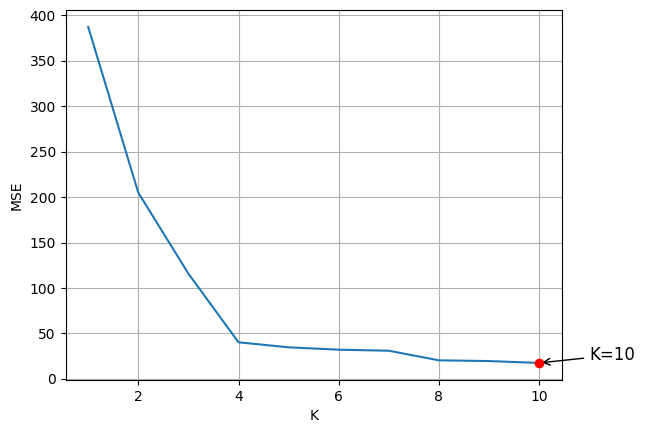

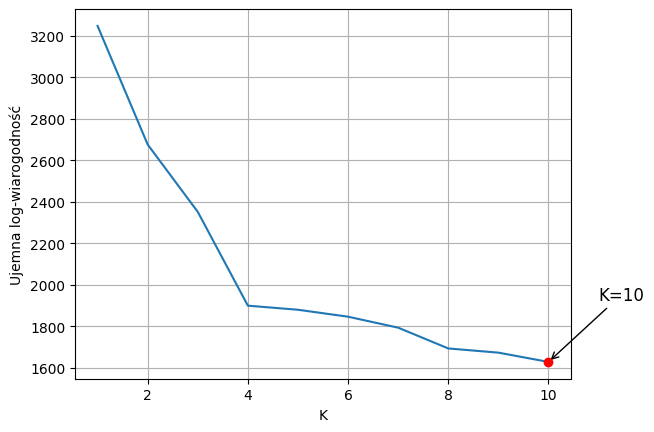

In [119]:
gamma_clusters_naive(K_max = 10, X = X)

### Wielokrotne przerzedzanie danych (kroswalidacja)

In [59]:
def create_zero_matrices(M, X):
    return [np.zeros(X.shape) for _ in range(M)]


In [60]:
from collections import Counter
def most_common_value(lst):
    
    counter = Counter(lst)
    
    most_common_element, count = counter.most_common(1)[0]
    
    return most_common_element

In [61]:
output_matrix = np.empty_like(X, dtype=object)

def multifold_gamma_thinning(alpha, eps, X):
    alpha_d = []
    for k in range(len(eps)):
        alpha_d.append(alpha*eps[k])
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            output_matrix[i,j] = X[i,j]*np.random.dirichlet(alpha = alpha_d, size=None)
    return output_matrix


eps = [0.2, 0.2, 0.2, 0.2, 0.2]
alpha = l
output_matrix = multifold_gamma_thinning(alpha = l, eps = eps, X = X)
print(output_matrix.shape)
print(X.shape)
output_matrix


(400, 2)
(400, 2)


array([[array([11.65334774, 11.19853443,  8.79727597,  6.63101077, 10.59893243]),
        array([0.45099024, 0.73119189, 0.40381943, 1.31210148, 0.99025001])],
       [array([0.5608317 , 0.31181707, 0.55454569, 0.31300409, 0.3959978 ]),
        array([ 5.47009009,  6.3483351 ,  5.71810075,  4.82159207, 16.4429763 ])],
       [array([0.33051703, 0.20541549, 0.78500986, 0.79537283, 0.39296392]),
        array([0.26735299, 0.28250461, 0.09005497, 0.22105192, 0.16717538])],
       [array([12.84873622,  5.10174628,  4.6508268 , 10.9683004 ,  6.46511972]),
        array([4.33629947, 8.70674798, 6.40413884, 5.20170041, 9.21109347])],
       [array([ 6.65935362,  4.62128785,  2.35319567, 10.30573144,  8.91964904]),
        array([0.74465254, 1.58070996, 1.31032195, 1.6252704 , 1.62721372])],
       [array([1.41685622, 1.57269252, 0.26822552, 1.7113471 , 0.76269404]),
        array([8.88061104, 2.09979065, 6.75448022, 9.56092406, 5.0587288 ])],
       [array([0.1254794 , 0.51978127, 0.60222032,

In [62]:
#Rysunki 6.10, 6.11 (wykres dotyczący ujemnej log-wiarogodności): kod wywoływany kilkukrotnie ze zmianami wartości parametru eps, zmianami wartości prawdziwego K oraz zmianami wartości na diagonali macierzy D

from sklearn.cluster import KMeans

def gamma_clusters_multifold(K_max = 10, eps = [0.2,0.2,0.2,0.2,0.2], X = X):

    M = len(eps)

    X_all = create_zero_matrices(M = M, X = X)

    colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink',
    'brown', 'grey', 'lime', 'indigo', 'teal', 'violet', 'gold', 'navy',
    'crimson', 'olive'
    ]
    selected_K = []

    plt.figure()
    plt.xlabel('K')
    plt.ylabel('Ujemna log-wiarogodność')
    plt.grid(True)

    
    for m in range(M):

        for k in range(X.shape[0]):
            for l in range(X.shape[1]):
                X_all[m][k,l] = output_matrix[k][l][m]

    for m in range(M):

        
        matrices_to_add = [X_all[mm] for mm in range(M) if mm != m]
        
        sum_matrix = sum(matrices_to_add)


        X_train = sum_matrix

        X_test = X_all[m]

        eps_test = eps[m]
        eps_train = 1 - eps_test

    
   
        loss_function_values = []
        for K in range(1, K_max+1, 1):
            kmeans = KMeans(n_clusters = K, random_state=0)

            kmeans.fit(X_train)

            c_hat = kmeans.labels_ + 1 #wyestymowane klastry: plus 1, zeby indeksowanie klastrów było od 0 a nie od 1
            

            unique_clusters = np.unique(c_hat)
            clusters_dict = {c: [] for c in unique_clusters}


            for i in range(X.shape[0]):
                cluster = c_hat[i]
                clusters_dict[cluster].append(X_train[i, :]) 

            clusters_lists = {c: np.array(cluster) for c, cluster in clusters_dict.items() if len(cluster) > 0}


            unique_clusters = np.unique(c_hat)
            estimated_betas = {c: None for c in unique_clusters}
            estimated_alphas = {c: None for c in unique_clusters}

                    
            estimated_betas = {}
            estimated_alphas = {}

            for c in unique_clusters:
                if c in clusters_lists:
                    estimated_alphas[c], estimated_betas[c] = estimates_corrected(X=clusters_lists[c])


            #mse_values = []
            suma_loss = 0
            for c in np.unique(c_hat):
                
                
                for i in range(X_test.shape[0]):
                    for j in range(X_test.shape[1]):
                        if c_hat[i] == c:

                            suma_loss = suma_loss + negative_log_likelihood_gamma(x=X_test[i,j], l=eps_test*estimated_alphas[c][j]/eps_train, theta=estimated_betas[c][j]) #estymacja alpha
                            #suma_loss = suma_loss + negative_log_likelihood_gamma(x=X_test[i,j], l=eps_test*l, theta=estimated_betas[c][j])


                #mse_values.append(suma / (n * d))

            loss_function_values.append(suma_loss)
        
        
        min_loss = min(loss_function_values)
        

        selected_K.append(np.where(np.array(loss_function_values) == min_loss)[0][0]+1)

        plt.plot(range(1, K_max+1), loss_function_values, color=colors[m % len(colors)], label=f'm={m+1}, K_min={np.where(np.array(loss_function_values) == min_loss)[0][0]+1}')
    
    plt.legend()
    plt.title(f'eps_train={np.round(eps, 2)}')
    plt.show()
    best_K = most_common_value(selected_K)

    print("Best K =", best_K) 

    


    

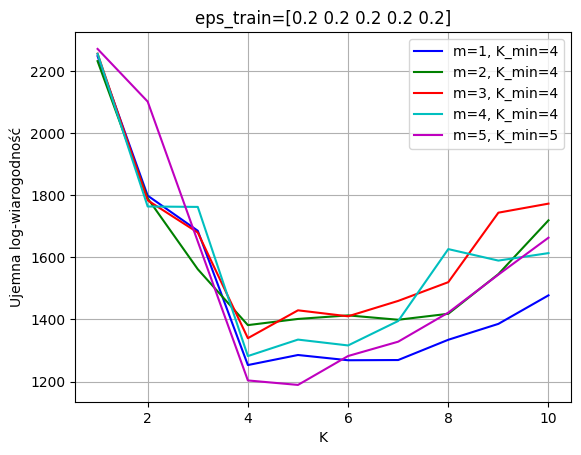

Best K = 4


In [116]:
gamma_clusters_multifold(K_max = 10, eps = [0.2,0.2,0.2,0.2,0.2], X = X)

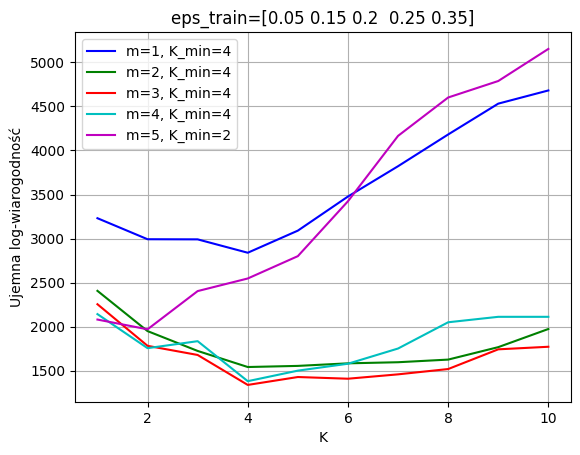

Best K = 4


In [117]:
gamma_clusters_multifold(K_max = 10, eps = [0.05,0.15,0.2,0.25,0.35], X = X)

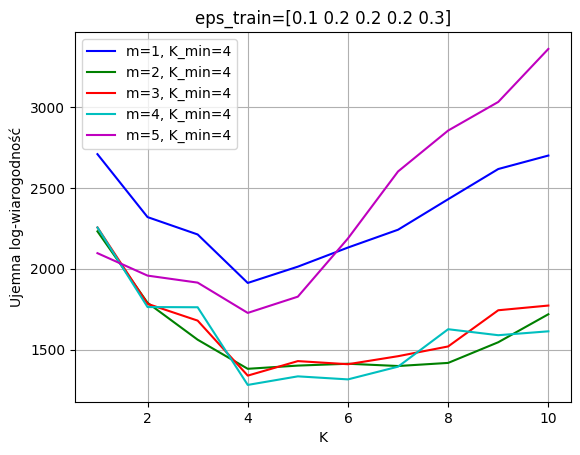

Best K = 4


In [118]:
gamma_clusters_multifold(K_max = 10, eps = [0.1,0.2,0.2,0.2,0.3], X = X)

In [66]:
#Rysunki 6.10, 6.11 (wykres dotyczący MSE): kod wywoływany kilkukrotnie ze zmianami wartości parametru eps, zmianami wartości prawdziwego K oraz zmianami wartości na diagonali macierzy D

from sklearn.cluster import KMeans

def gamma_clusters_multifold_mse(K_max = 10, eps = [0.2,0.2,0.2,0.2,0.2], X = X):

    M = len(eps)

    X_all = create_zero_matrices(M = M, X = X)

    colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink',
    'brown', 'grey', 'lime', 'indigo', 'teal', 'violet', 'gold', 'navy',
    'crimson', 'olive'
    ]
    selected_K = []

    plt.figure()
    plt.xlabel('K')
    plt.ylabel('MSE')
    plt.grid(True)

    
    for m in range(M):

        for k in range(X.shape[0]):
            for l in range(X.shape[1]):
                X_all[m][k,l] = output_matrix[k][l][m]

    for m in range(M):

        
        matrices_to_add = [X_all[mm] for mm in range(M) if mm != m]
        
        sum_matrix = sum(matrices_to_add)


        X_train = sum_matrix

        X_test = X_all[m]

        eps_test = eps[m]
        eps_train = 1 - eps_test

    
   
        mse_values = []
        for K in range(1, K_max+1, 1):
            kmeans = KMeans(n_clusters = K, random_state=0)

            kmeans.fit(X_train)

            c_hat = kmeans.labels_ + 1 #wyestymowane klastry: plus 1, zeby indeksowanie klastrów było od 0 a nie od 1

            unique_clusters = np.unique(c_hat)
            clusters_dict = {c: [] for c in unique_clusters}


            for i in range(X.shape[0]):
                cluster = c_hat[i]
                clusters_dict[cluster].append(X_train[i, :]) 

            clusters_lists = {c: np.array(cluster) for c, cluster in clusters_dict.items() if len(cluster) > 0}

            unique_clusters = np.unique(c_hat)
            estimated_betas = {c: None for c in unique_clusters}
            estimated_alphas = {c: None for c in unique_clusters}

                    
            estimated_betas = {}
            estimated_alphas = {}

            for c in unique_clusters:
                if c in clusters_lists:
                    estimated_alphas[c], estimated_betas[c] = estimates_corrected(X=clusters_lists[c])


            
            suma = 0
            for c in np.unique(c_hat):
            
            
                for i in range(X_test.shape[0]):
                    for j in range(X_test.shape[1]):
                        if c_hat[i] == c:

                            suma = suma + (X_test[i, j] - eps_test/eps_train * estimated_alphas[c][j] / estimated_betas[c][j])**2 #estymacja alpha
                            #suma = suma + (X_test[i, j] - eps_test/eps_train*l/estimated_betas[c][j])**2
                            #suma = suma + (X_test[i, j] - ((eps_test*l/estimated_betas[c][j])))**2 



            mse_values.append(suma / (n * d))

        
 
        min_loss = min(mse_values)


        selected_K.append(np.where(np.array(mse_values) == min_loss)[0][0]+1)

        plt.plot(range(1, K_max+1), mse_values, color=colors[m % len(colors)], label=f'm={m+1}, K_min={np.where(np.array(mse_values) == min_loss)[0][0]+1}')

    
    plt.legend()
    plt.title(f'eps_train={np.round(eps, 2)}')
    plt.show()
    best_K = most_common_value(selected_K)

    print("Best K =", best_K) 

    


    

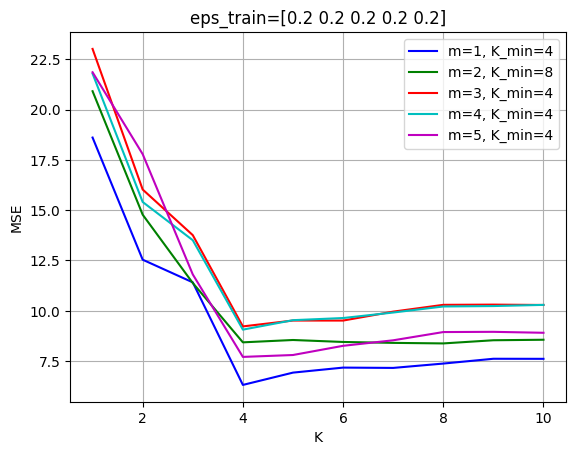

Best K = 4


In [113]:
gamma_clusters_multifold_mse(K_max = 10, eps = [0.2,0.2,0.2,0.2,0.2], X = X)

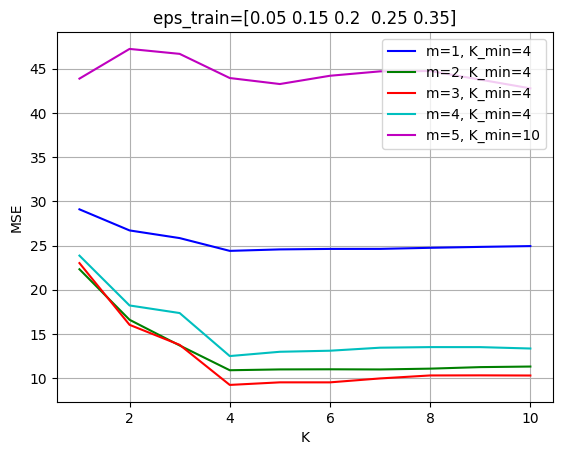

Best K = 4


In [114]:
gamma_clusters_multifold_mse(K_max = 10, eps = [0.05,0.15,0.2,0.25,0.35], X = X)

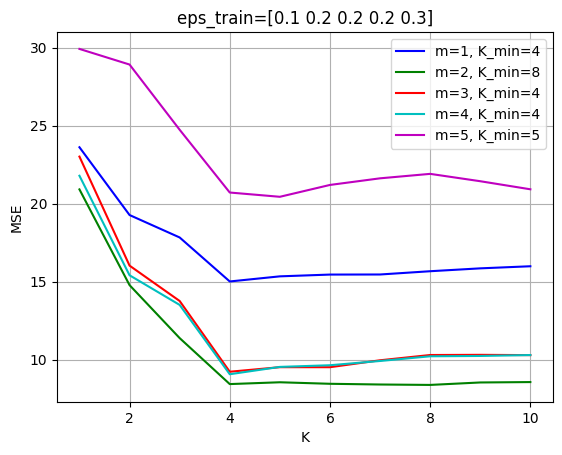

Best K = 4


In [115]:
gamma_clusters_multifold_mse(K_max = 10, eps = [0.1,0.2,0.2,0.2,0.3], X = X)